###### Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and kmean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters)

In [1]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
Wine_data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\8.PCA\wine.csv')
Wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735

###### Data description
Number of Attributes:13 numeric, predictive attributes and the class.

Attribute Information:
+ Alcohol
+ Malic acid
+ Ash
+ Alcalinity of ash
+ Magnesium
+ Phenols
+ Flavanoids
+ Nonflavanoid phenols
+ Proanthocyanins
+ Color intensity
+ Hue
+ Dilution
+ Proline

###### Data Exploration

In [4]:
Wine_data.shape

(178, 14)

In [5]:
Wine_data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [6]:
Wine_data.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

We are dropping 'Type' column, as it is a classifier that we have three types of wines which we need to find in clustering. By keeping it will affect our inferences and further analysis.

In [7]:
#dropping 'type' column
Data=Wine_data.drop('Type',axis=1)

In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [9]:
Data.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [10]:
Data.duplicated().sum()

0

There are no null values and duplicate values.

In [11]:
#descriptive statistics
Data.describe()

Alcohol       Malic         Ash  Alcalinity   Magnesium     Phenols  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    2.336348    2.366517   19.494944   99.741573    2.295112   
std      0.811827    1.117146    0.274344    3.339564   14.282484    0.625851   
min     11.030000    0.740000    1.360000   10.600000   70.000000    0.980000   
25%     12.362500    1.602500    2.210000   17.200000   88.000000    1.742500   
50%     13.050000    1.865000    2.360000   19.500000   98.000000    2.355000   
75%     13.677500    3.082500    2.557500   21.500000  107.000000    2.800000   
max     14.830000    5.800000    3.230000   30.000000  162.000000    3.880000   

       Flavanoids  Nonflavanoids  Proanthocyanins       Color         Hue  \
count  178.000000     178.000000       178.000000  178.000000  178.000000   
mean     2.029270       0.361854         1.590899    5.058090    0.957449   
std      0.998859       0.124453         0.572359    2.318286    0.228572   
min      0.340000       0.130000         0.410000    1.280000    0.480000   
25%      1.205000       0.270000         1.250000    3.220000    0.782500   
50%      2.135000       0.340000         1.555000    4.690000    0.965000   
75%      2.875000       0.437500         1.950000    6.200000    1.120000   
max      5.080000       0.660000         3.580000   13.000000    1.710000   

         Dilution      Proline  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

Looking for some statistical information about each feature, we can see that the features have very diferrent scales.

#### Exploratory Data Analysis

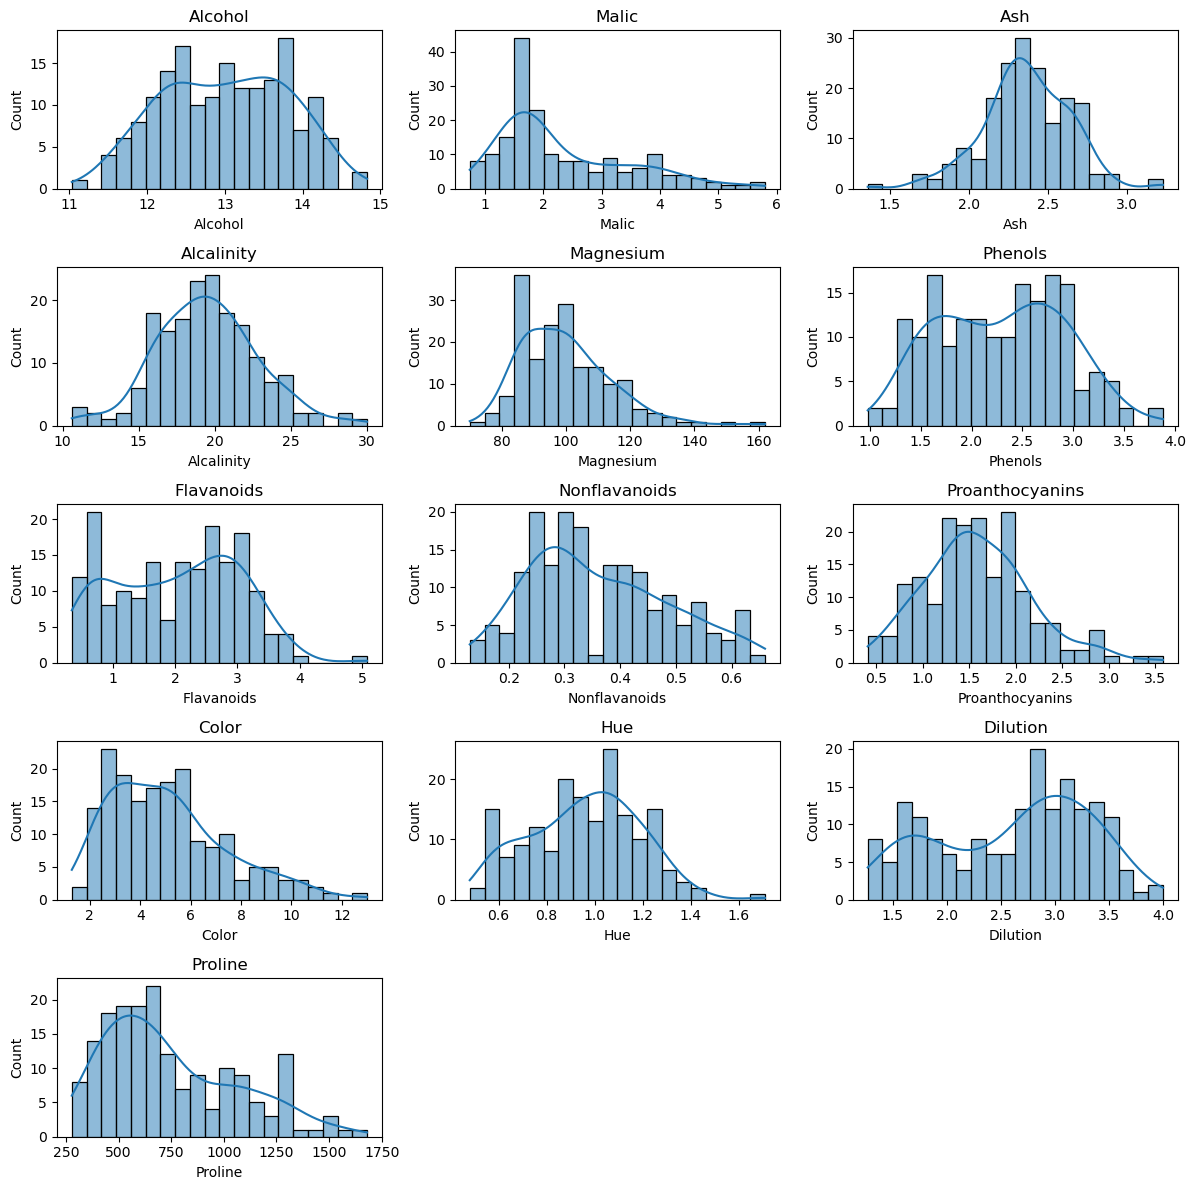

In [12]:
# Explore the distribution of numerical features
num_features=['Alcohol','Malic','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color','Hue','Dilution','Proline']

plt.figure(figsize=(12, 12))
for i,feature in enumerate(num_features,1):
    plt.subplot(5,3,i)
    sns.histplot(Data[feature],bins=20,kde=True)              
    plt.title(feature)
plt.tight_layout()
plt.show()

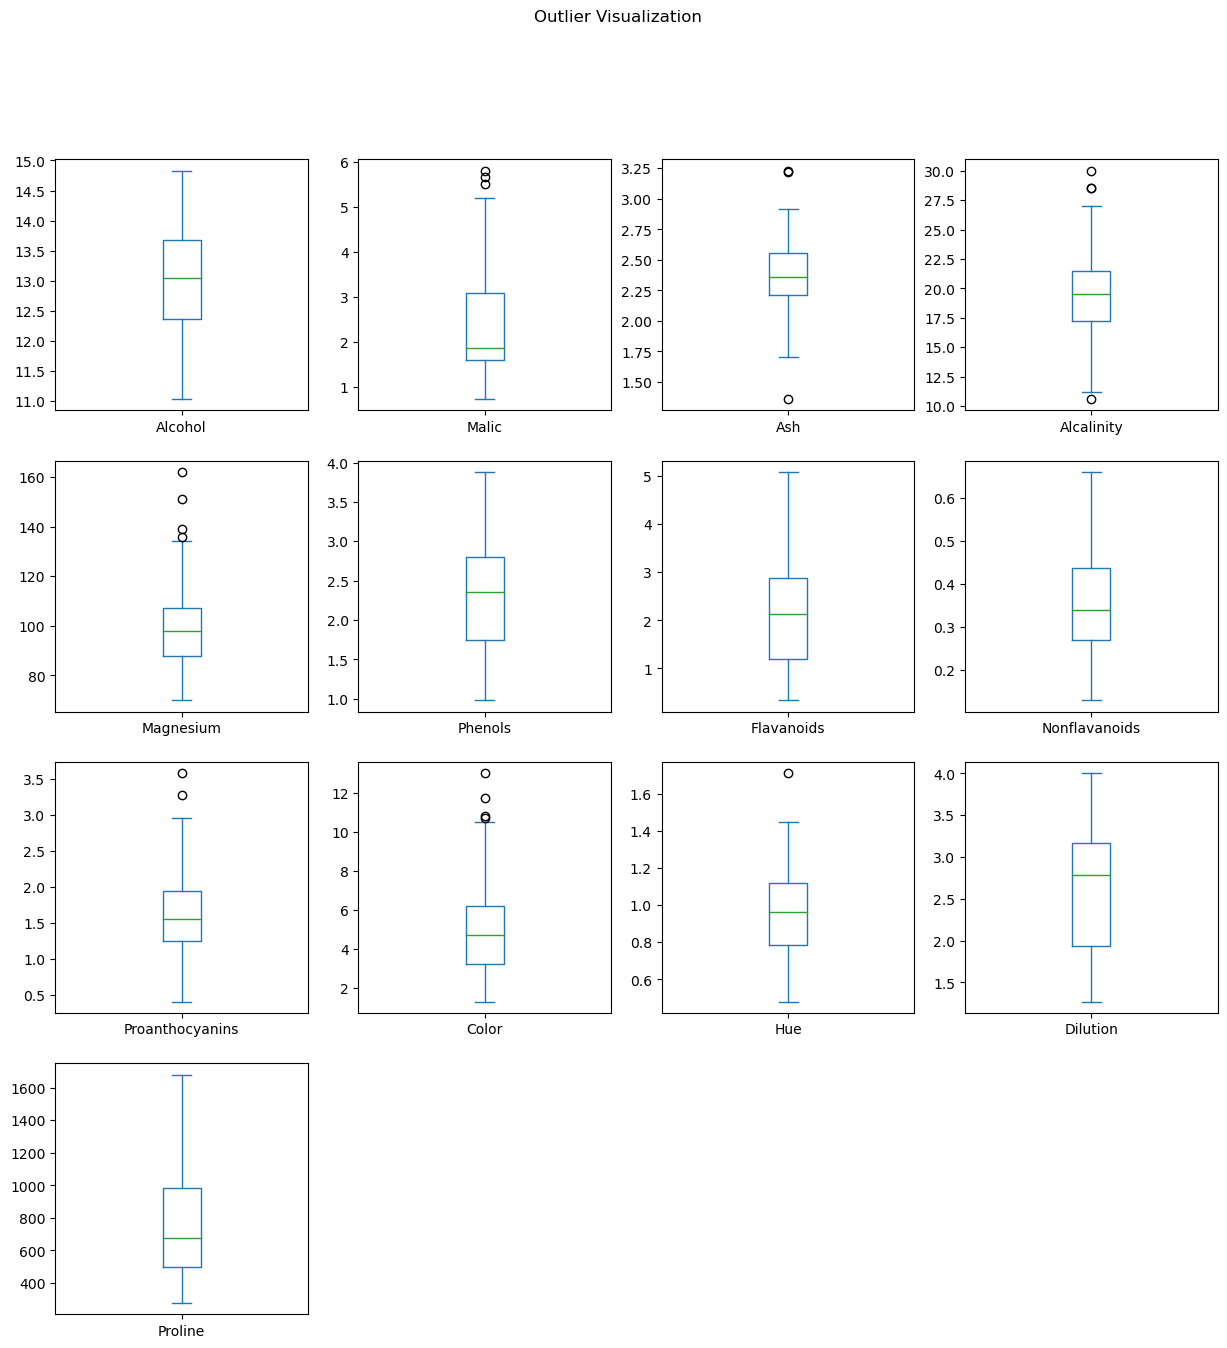

In [13]:
#outlier visualization
Data.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,15),title='Outlier Visualization')
plt.show()

###### Data Visualization

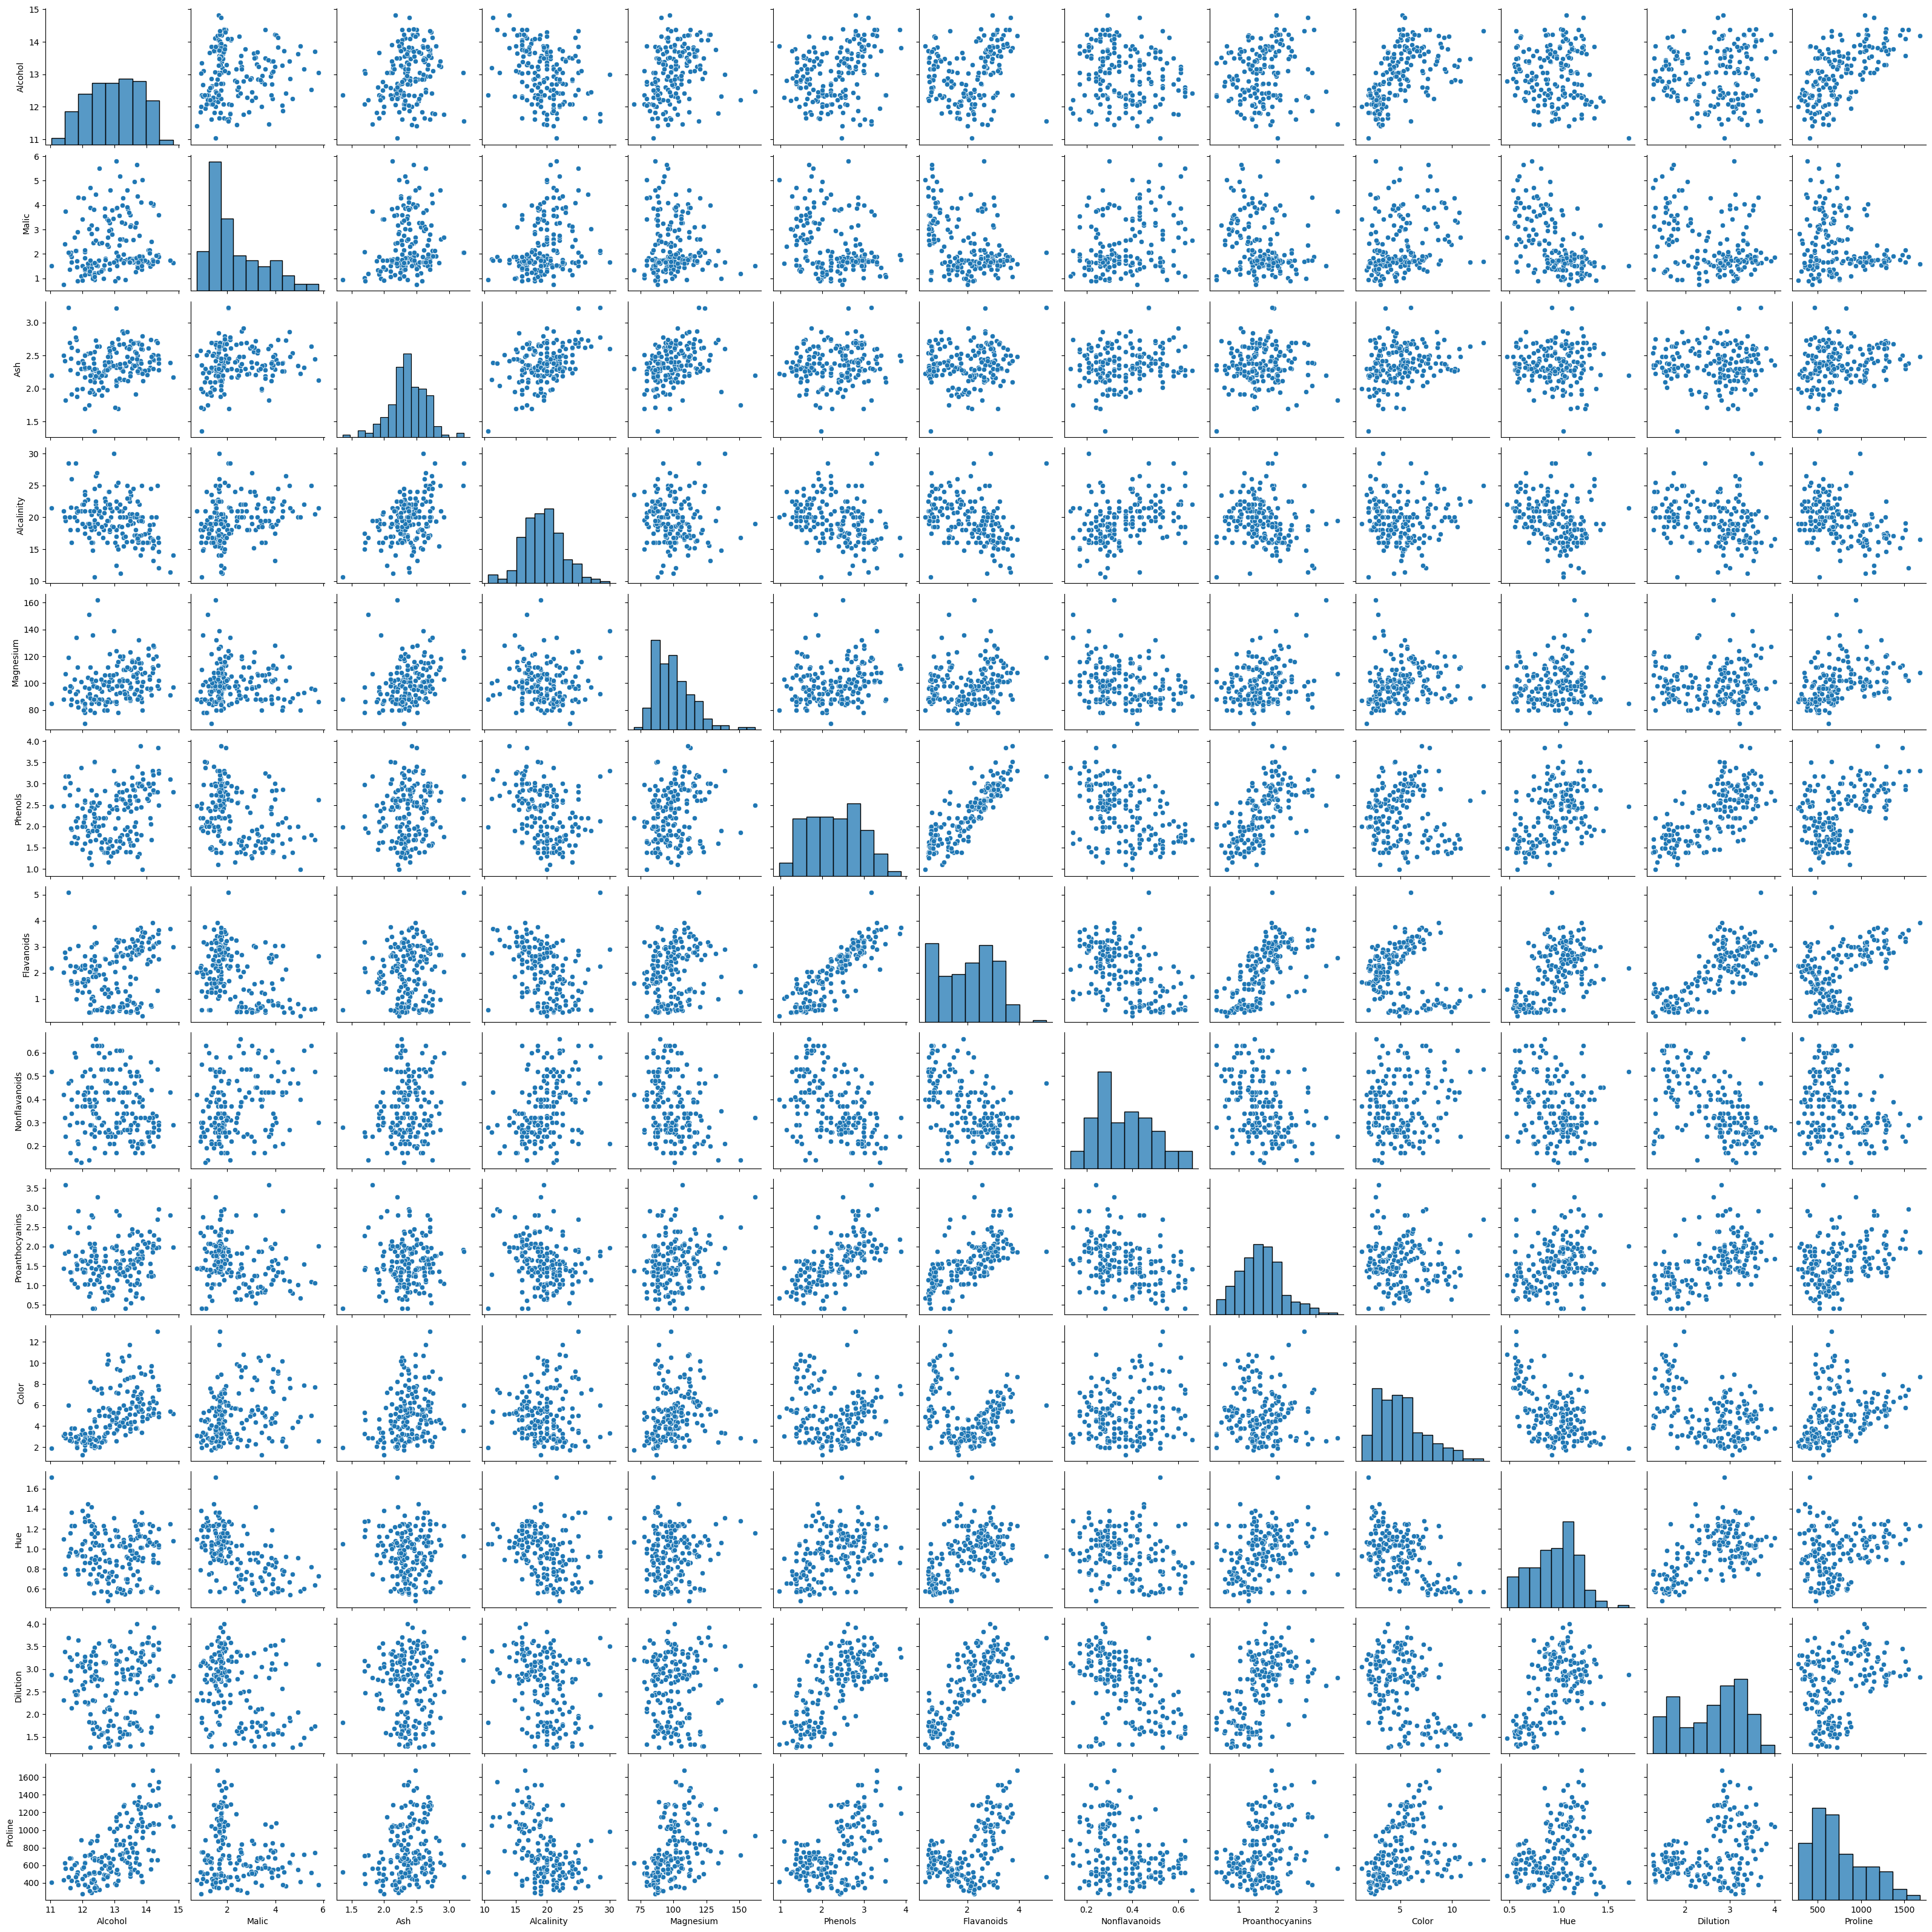

In [14]:
sns.pairplot(Data,palette="dark")

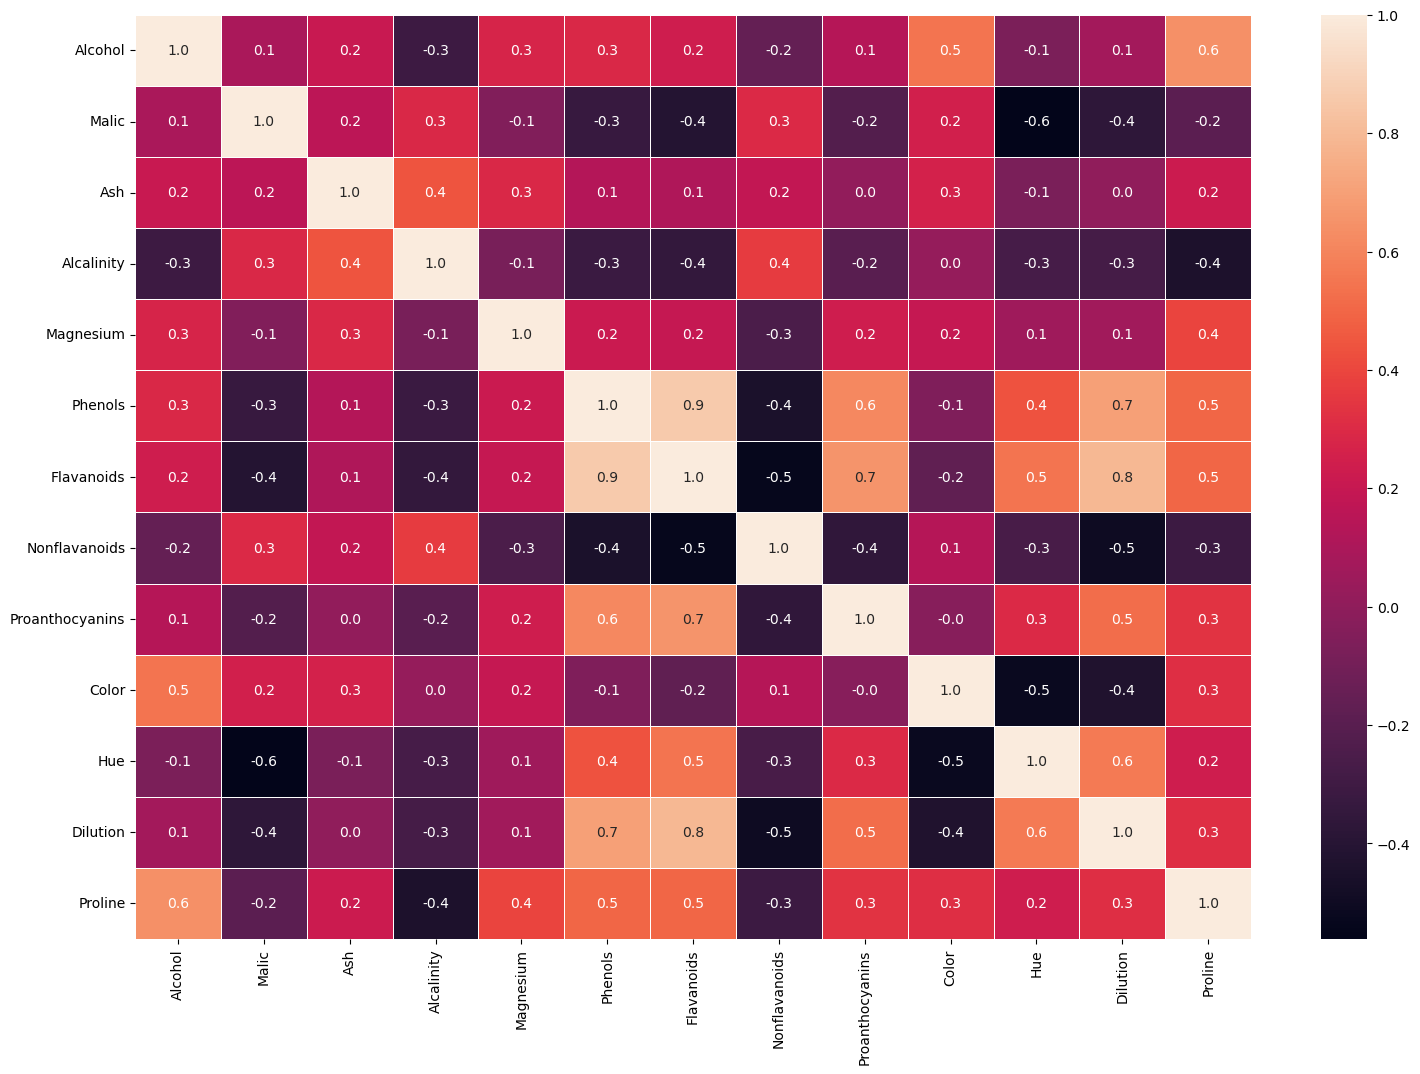

In [15]:
# correlation heatmap
f,ax=plt.subplots(figsize=(18,12))
sns.heatmap(Data.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

+ Phenols is positively correlated with Flavanoids, Dilution and Proanthocyanins
+ Flavanoids is positively correlated with Proanthocyanins and Dilution
+ Dilution is positively correlated with Hue
+ Alcohol is positively correlated with Proline

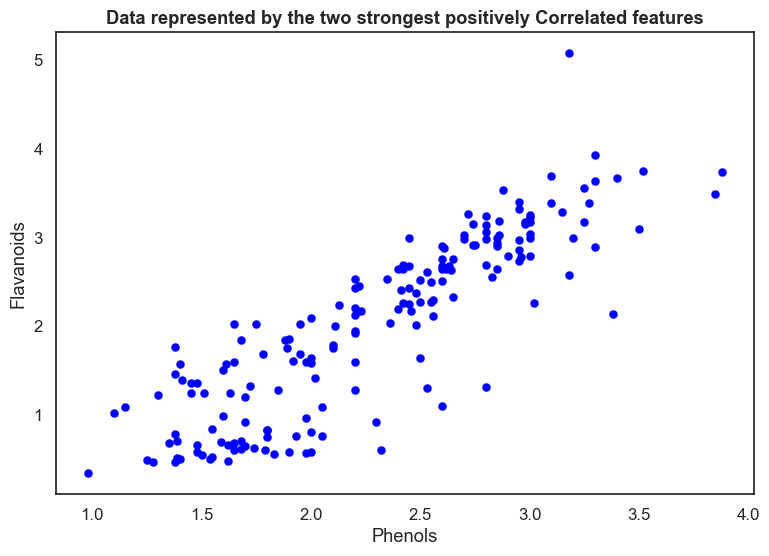

In [16]:
# Plotting Phenols vs.Flavanoids  
sns.set(style='white',rc={'figure.figsize':(9,6)},font_scale=1.1)
plt.scatter(x=Data['Phenols'],y=Data['Flavanoids'],color='blue',lw=0.1)
plt.xlabel('Phenols')
plt.ylabel('Flavanoids')
plt.title('Data represented by the two strongest positively Correlated features',fontweight='bold')
plt.show()

###### Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#standardization
standard_scaler=StandardScaler()
std_data=standard_scaler.fit_transform(Data)
std_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

###### PCA on standard  data

Explained variance

It shows how much of the variance/spread of the data is captured in each dimension, i.e. how important each additional principal component is to the original data representation.

In [19]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA

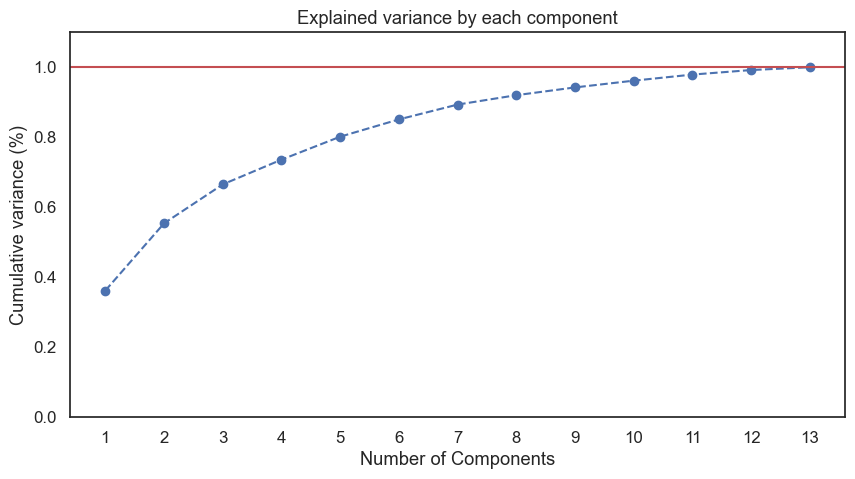

In [20]:
#PCA
pca_var=PCA()
pca_var.fit(std_data)

#Plot
plt.figure(figsize=(10,5))
xi=np.arange(1,1+std_data.shape[1],step=1)
yi=np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi,yi,marker='o',linestyle='--',color='b')

#Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1,1+std_data.shape[1],step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1,color='r',linestyle='-')
plt.gca().xaxis.grid(False)

In [21]:
#the amount of variance that each PCA explains is 
var=pca_var.explained_variance_ratio_
var 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

Text(0.5, 1.0, 'Explained variance by each component')

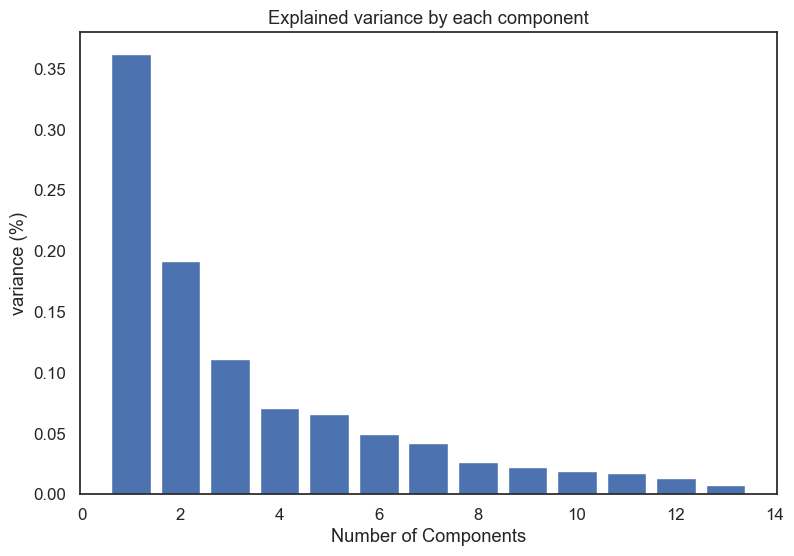

In [22]:
plt.bar(range(1,len(var)+1),var)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')

In [23]:
#Cumulative Variance
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [24]:
#PCA
pca=PCA(n_components=3)
pca_std=pca.fit_transform(std_data)

#Convert to data frame
pca_std_data=pd.DataFrame(data=pca_std,columns=['PC1','PC2','PC3'])

#Shape and preview
print(pca_std_data.shape)
pca_std_data.head()

(178, 3)


PC1       PC2       PC3
0  3.316751 -1.443463 -0.165739
1  2.209465  0.333393 -2.026457
2  2.516740 -1.031151  0.982819
3  3.757066 -2.756372 -0.176192
4  1.008908 -0.869831  2.026688

Text(0, 0.5, 'PC2')

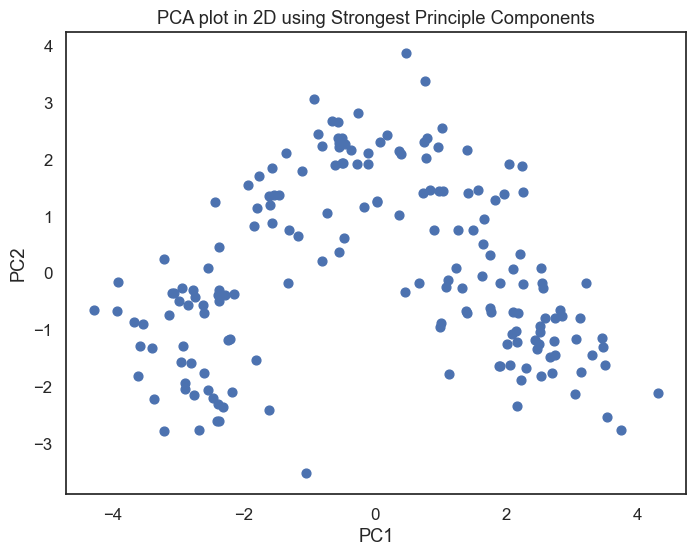

In [25]:
#PCA plot in 2D
#Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],s=40)

# Aesthetics
plt.title('PCA plot in 2D using Strongest Principle Components')
plt.xlabel('PC1')
plt.ylabel('PC2')

+ Notice how these points have no colours (yet) because we don't know what their classes are. This is what makes it an unsupervised method.
+ We know our dataset falls naturally into 3 classes (3 types of wine), so we assign colours by clustering the data into 3 groups using techniques such as k-Means and Hierarchical.

###### KMeans Clustering

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

In [27]:
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia=[] # inertia of clusters
s_scores=[] # silhouette scores

for n in n_clusters:
    KM_est=KMeans(n_clusters=n, init='k-means++').fit(pca_std_data)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg=silhouette_score(pca_std_data,KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

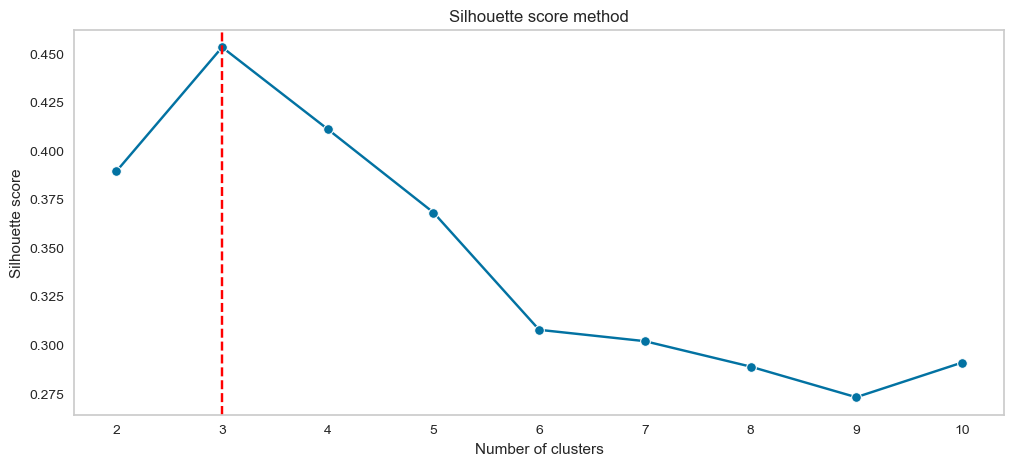

In [28]:
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3,ls="--",c="red")
plt.grid()
plt.show()

In [29]:
clust_list=[2,3,4,5,6,7,8,9]
#Silhouette score for stadardScaler applied on data.
for n_clusters in clust_list:
    clusterer1=KMeans(n_clusters=n_clusters,random_state=0)
    cluster_labels1=clusterer1.fit_predict(pca_std_data)
    sil_score1=sil(pca_std_data,cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3893881308900328
For n_clusters = 3 The average silhouette_score is : 0.45323512156839485
For n_clusters = 4 The average silhouette_score is : 0.40719659946331627
For n_clusters = 5 The average silhouette_score is : 0.381926494881263
For n_clusters = 6 The average silhouette_score is : 0.3189496710596297
For n_clusters = 7 The average silhouette_score is : 0.3031271739716027
For n_clusters = 8 The average silhouette_score is : 0.2976152819938032
For n_clusters = 9 The average silhouette_score is : 0.28998198250936874


+ Silhouette score method indicates the best options would be respectively 3 clusters.
+ According the the silhouette score of:The standardized data, the ideal number of clusters is 3, with a score higher than other options, of 0.45.

###### Building KMeans Cluster algorithm using K=3 and PCA on standard scaler applied Data

In [30]:
model_kmeans=KMeans(n_clusters=3,random_state=42)
model_kmeans.fit(pca_std_data)
labels=model_kmeans.labels_

In [31]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [32]:
model_kmeans.cluster_centers_

array([[-2.72003575e+00, -1.12565126e+00, -2.39093241e-01],
       [ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01]])

In [33]:
model_kmeans.inertia_

513.0564645910774

In [34]:
#Assign clusters to the data set
Wine_data['KMeans_Labels']=labels
Wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   KMeans_Labels  
0              1  
1              1  
2              1  
3              1  
4              1

In [35]:
#Group data by Clusters
Wine_data.groupby('KMeans_Labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                   mean       mean      mean      mean       mean        mean   
KMeans_Labels                                                                   
0              2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
1              1.048387  13.676774  1.997903  2.466290  17.462903  107.967742   
2              2.000000  12.250923  1.897385  2.231231  20.063077   92.738462   

                Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                   mean       mean          mean            mean      mean   
KMeans_Labels                                                                
0              1.683922   0.818824      0.451961        1.145882  7.234706   
1              2.847581   3.003226      0.292097        1.922097  5.453548   
2              2.247692   2.050000      0.357692        1.624154  2.973077   

                    Hue  Dilution      Proline  
                   mean      mean         mean  
KMeans_Labels                                   
0              0.691961  1.696667   619.058824  
1              1.065484  3.163387  1100.225806  
2              1.062708  2.803385   510.169231

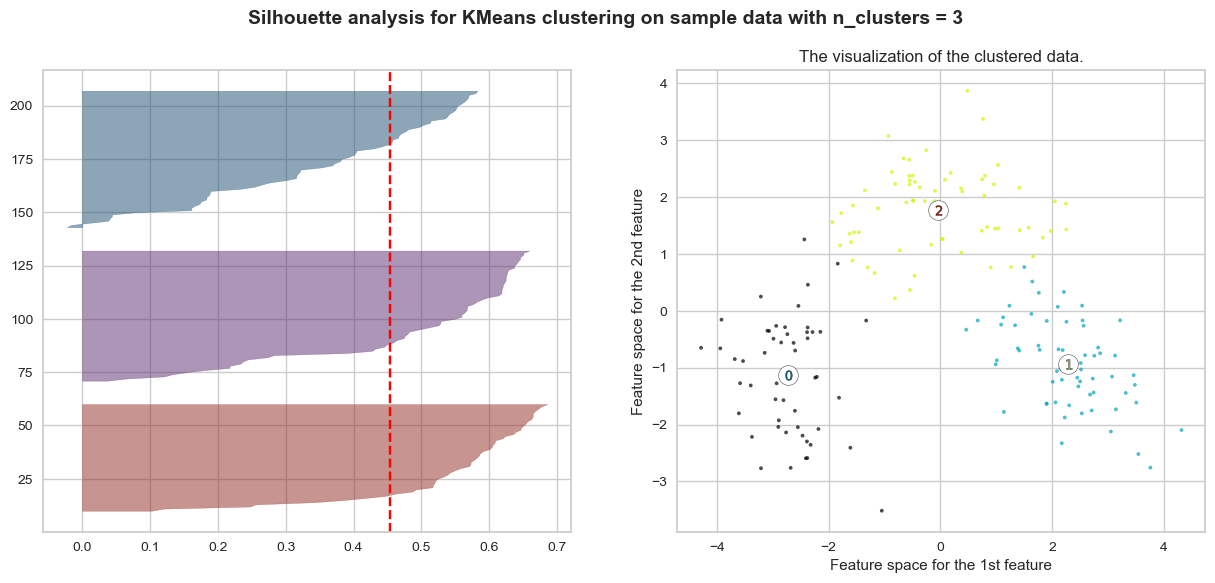

In [36]:
from yellowbrick.cluster import SilhouetteVisualizer

fig,(ax1,ax2)=plt.subplots(1,2,sharey=False)
fig.set_size_inches(15,6)



sil_visualizer1=SilhouetteVisualizer(model_kmeans,ax= ax1,colors=['#922B21','#5B2C6F','#1B4F72'])
sil_visualizer1.fit(pca_std_data)


# 2nd Plot showing the actual clusters formed

colors1=cm.nipy_spectral(model_kmeans.labels_.astype(float)/3) # 3 is number of clusters
ax2.scatter(pca_std_data.iloc[:, 0],pca_std_data.iloc[:, 1], marker='.',s=30,lw=0,alpha=0.7,
                c=colors1,edgecolor='k')

# Labeling the clusters
centers1=model_kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers1[:, 0],centers1[:, 1],marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers1):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')


ax2.set_title(label ="The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % 3),fontsize=14, fontweight='bold')

#sil_visualizer1.show()
plt.show()

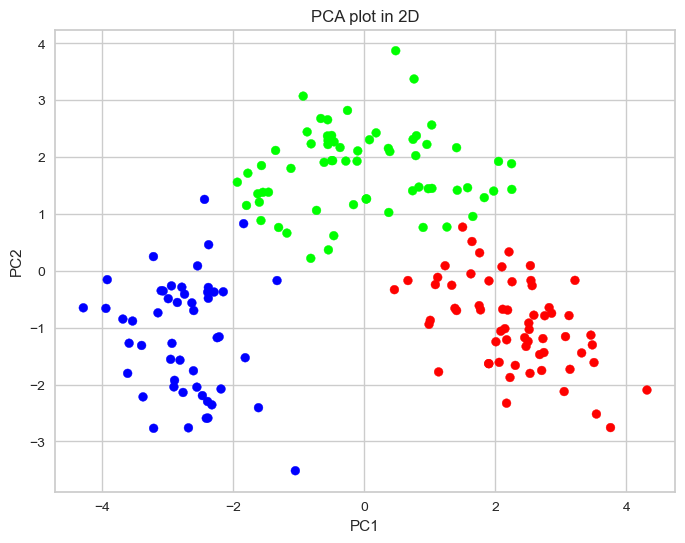

In [37]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['KMeans_Labels'],cmap="brg",s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can now clearly see the 3 number of clusters formed.

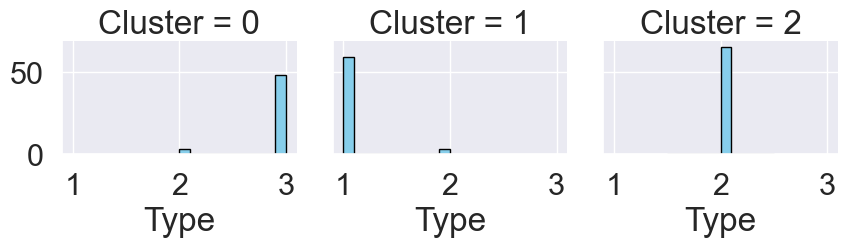

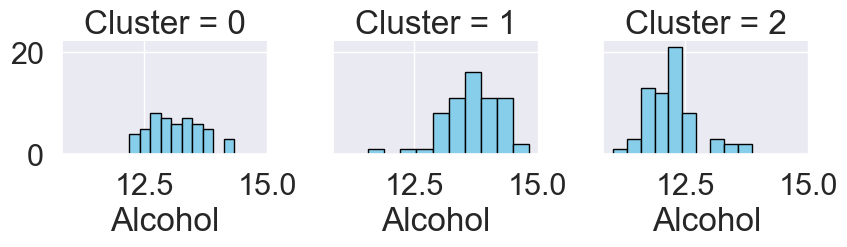

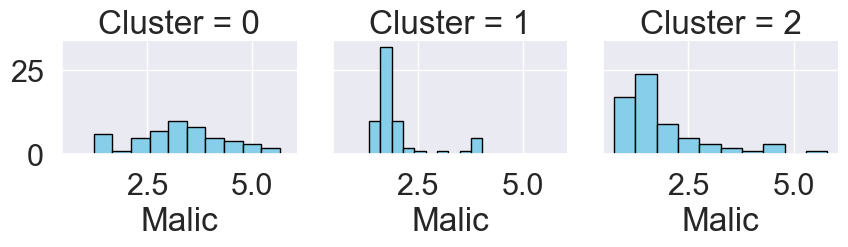

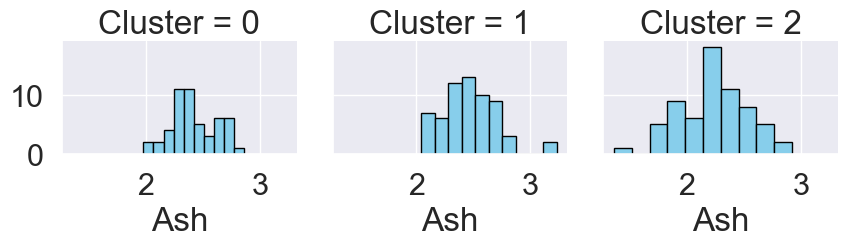

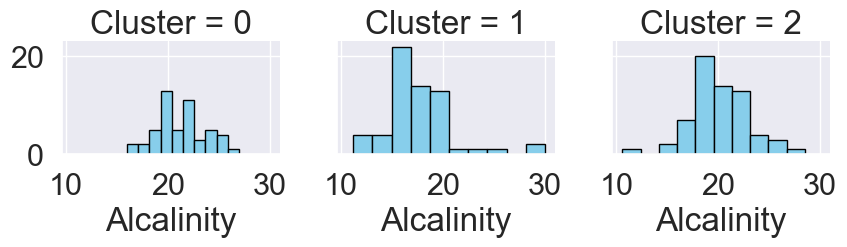

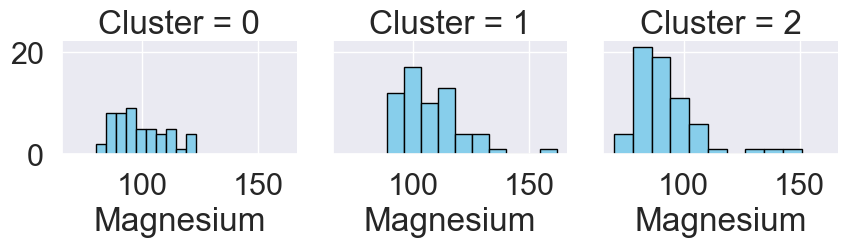

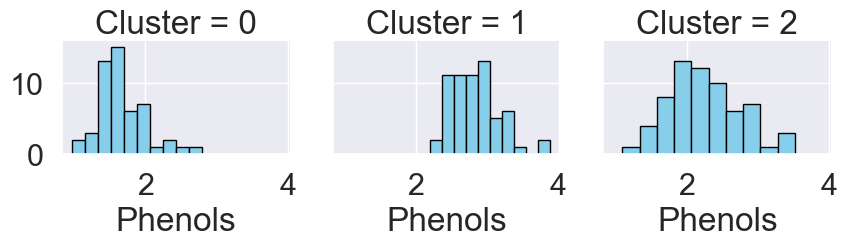

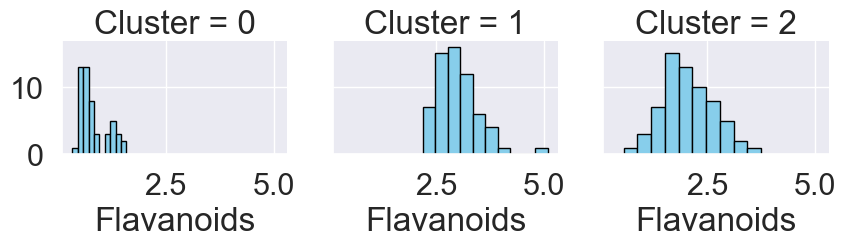

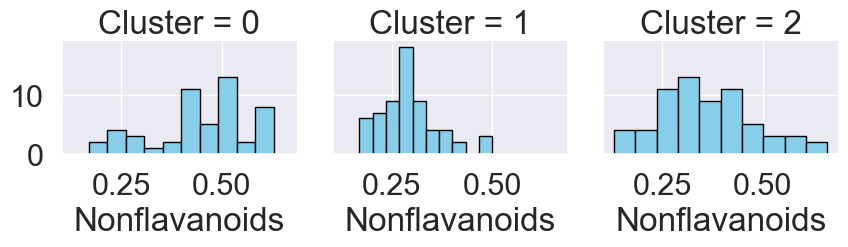

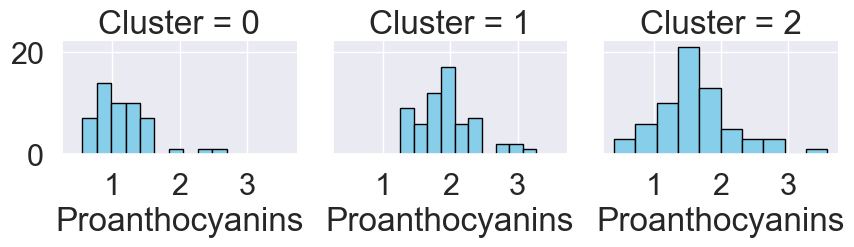

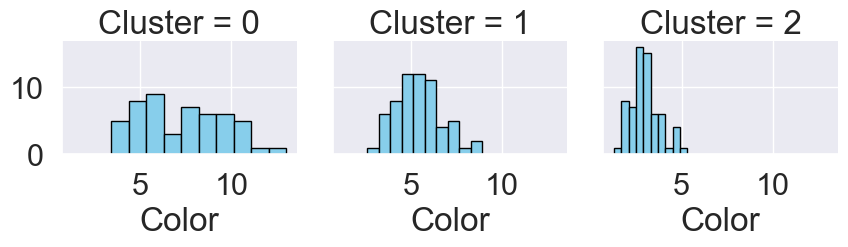

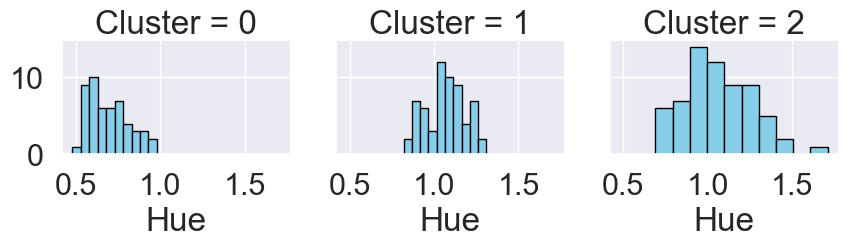

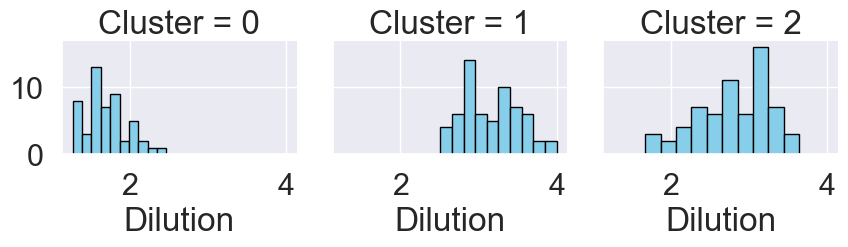

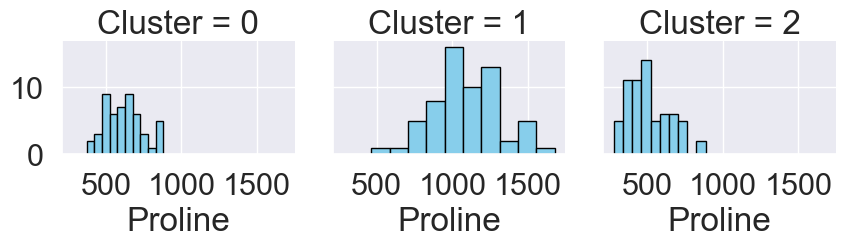

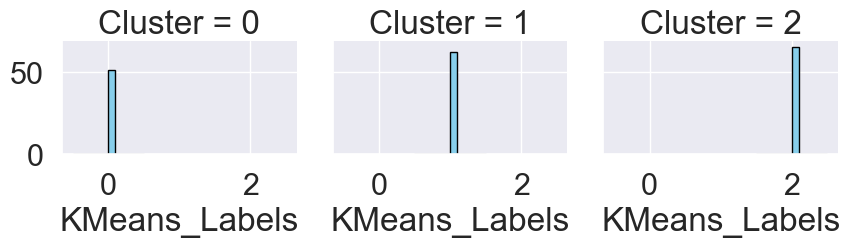

In [38]:
df1=Wine_data.copy()
df1['Cluster']=model_kmeans.labels_

aux=df1.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid",rc={'figure.figsize':(15,15)},font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid=sns.FacetGrid(df1,col="Cluster")
    grid.map(plt.hist,cluster,color="skyblue",lw=1,edgecolor="black")

In [39]:
# Sorting elements based on cluster label assigned and taking average for insights.
cluster1=pd.DataFrame(df1.loc[df1.Cluster==0].mean(),columns=['Cluster1_avg'])
cluster2=pd.DataFrame(df1.loc[df1.Cluster==1].mean(),columns=['Cluster2_avg'])
cluster3=pd.DataFrame(df1.loc[df1.Cluster==2].mean(),columns=['Cluster2_avg'])

In [40]:
Avg_df=pd.concat([cluster1,cluster2,cluster3],axis=1)
Avg_df.head()

Cluster1_avg  Cluster2_avg  Cluster2_avg
Type            2.941176      1.048387      2.000000
Alcohol        13.134118     13.676774     12.250923
Malic           3.307255      1.997903      1.897385
Ash             2.417647      2.466290      2.231231
Alcalinity     21.241176     17.462903     20.063077

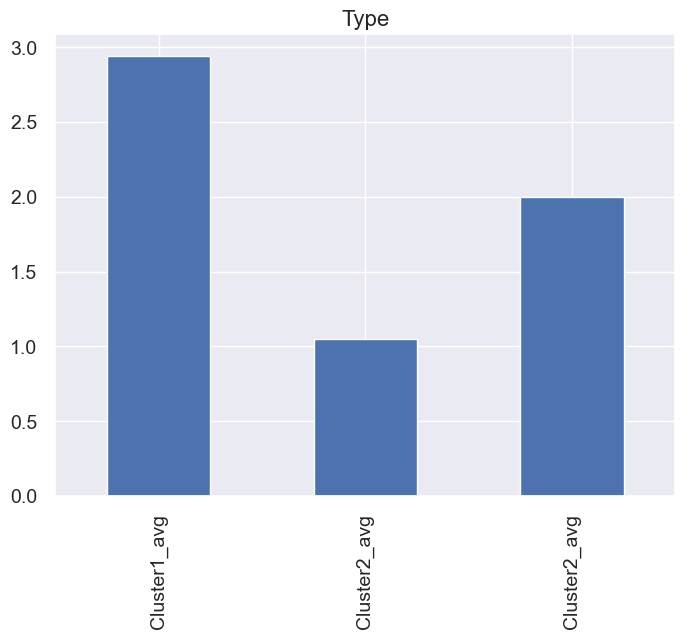

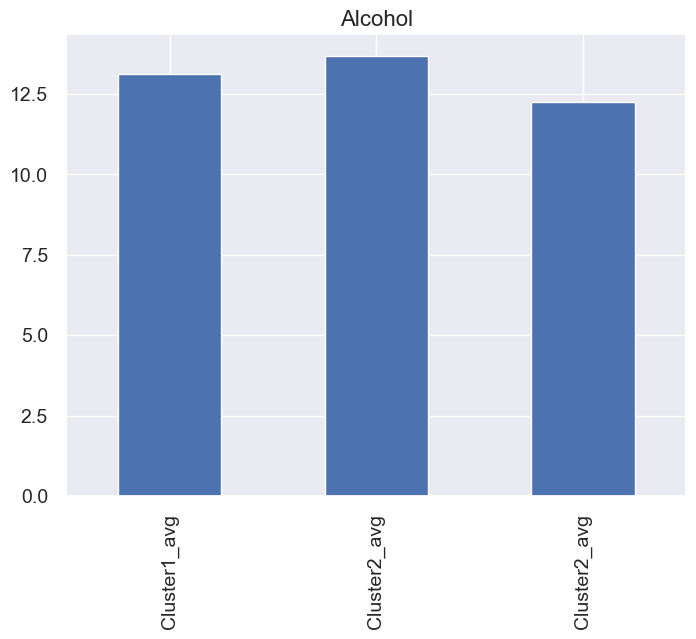

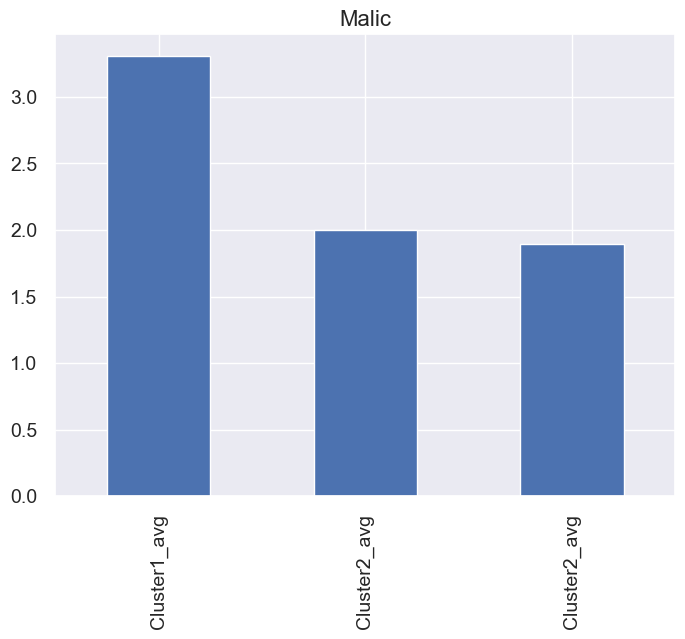

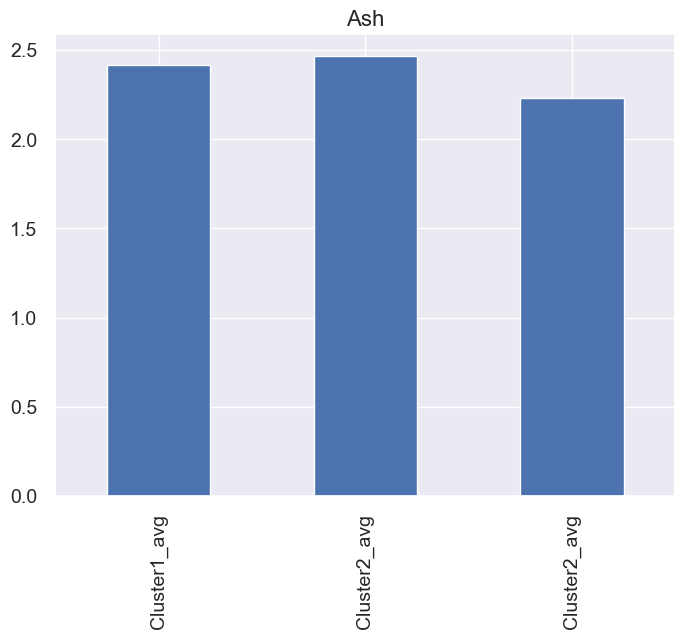

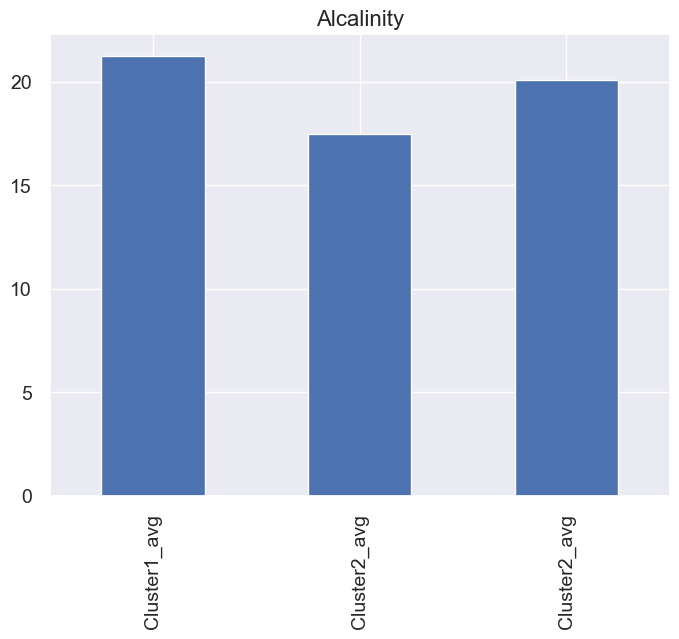

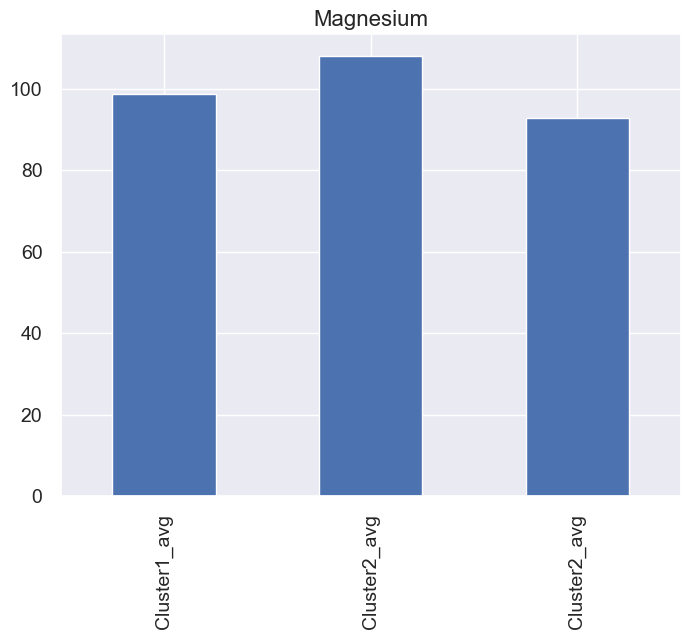

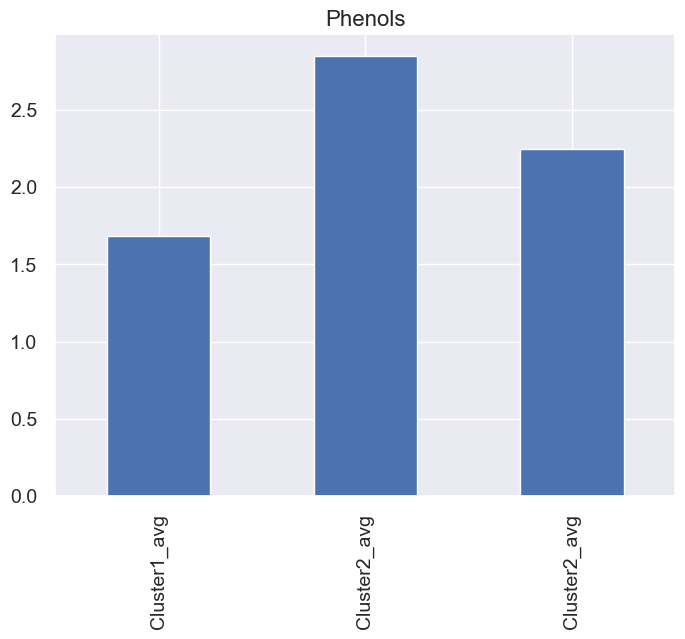

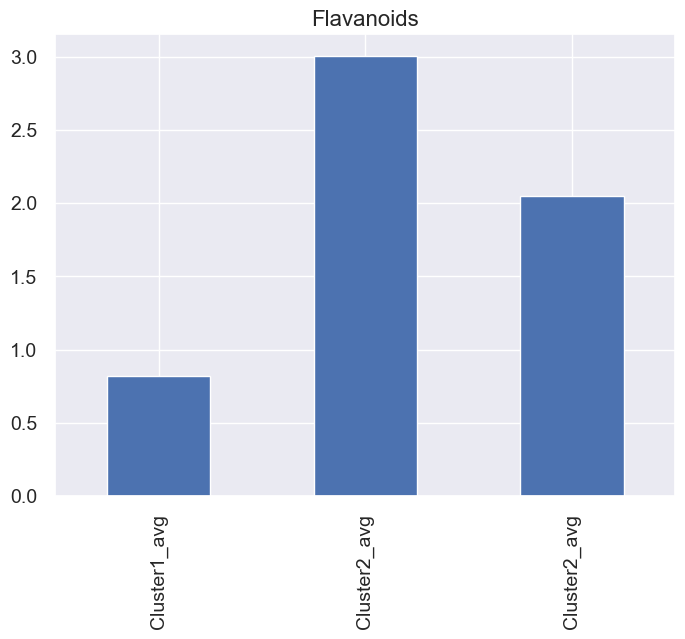

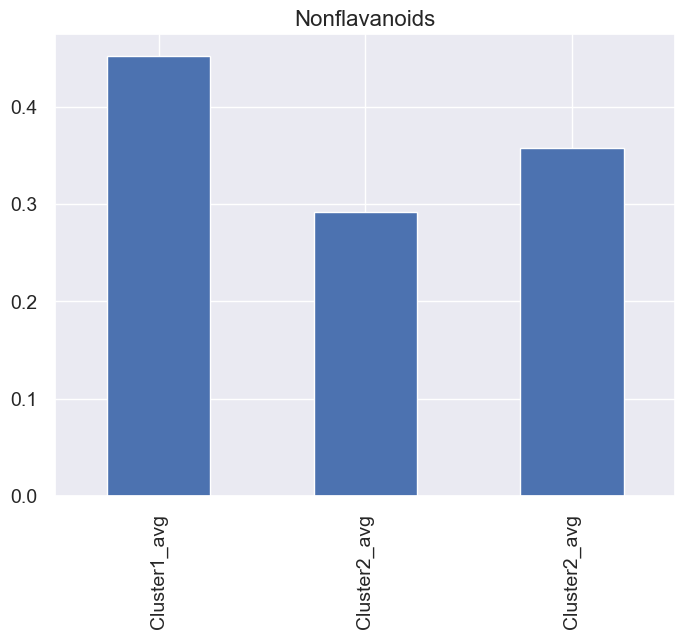

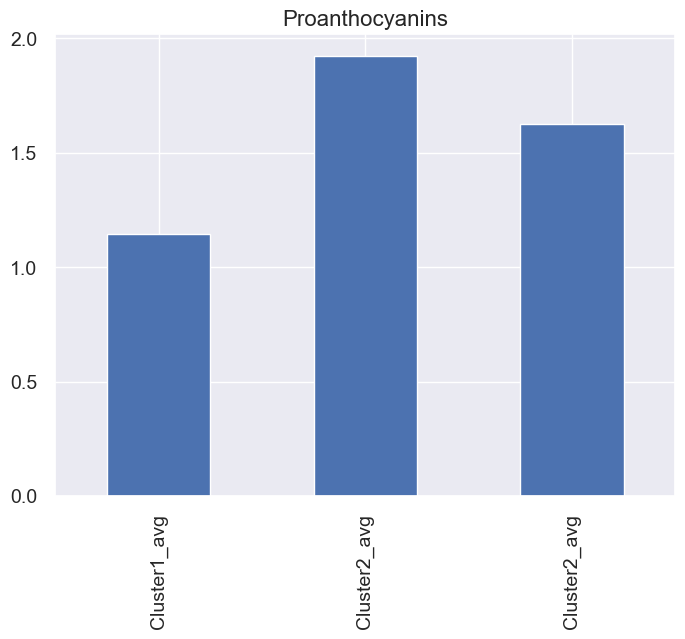

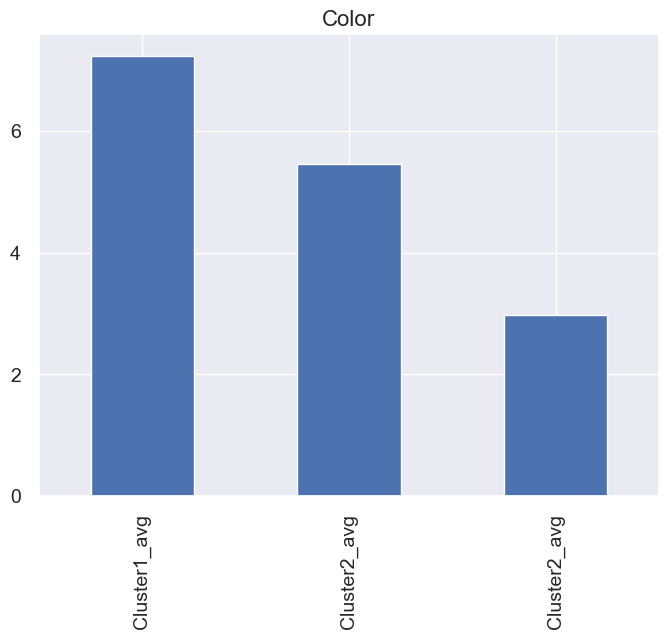

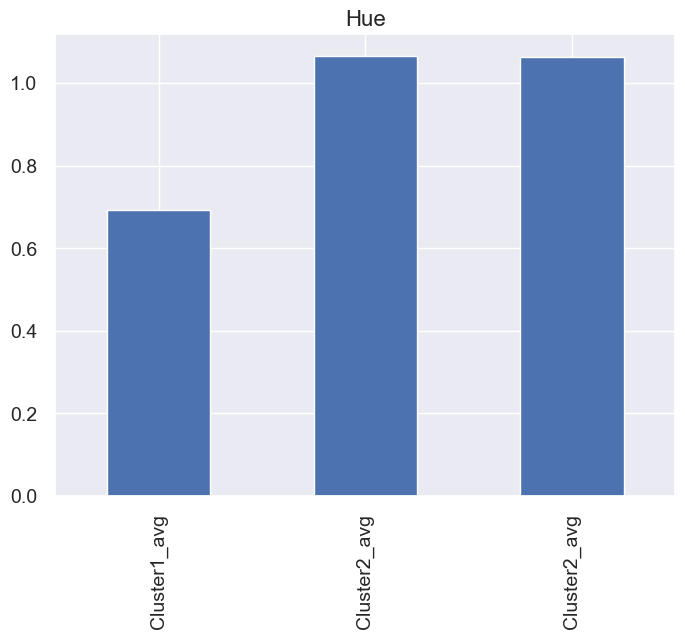

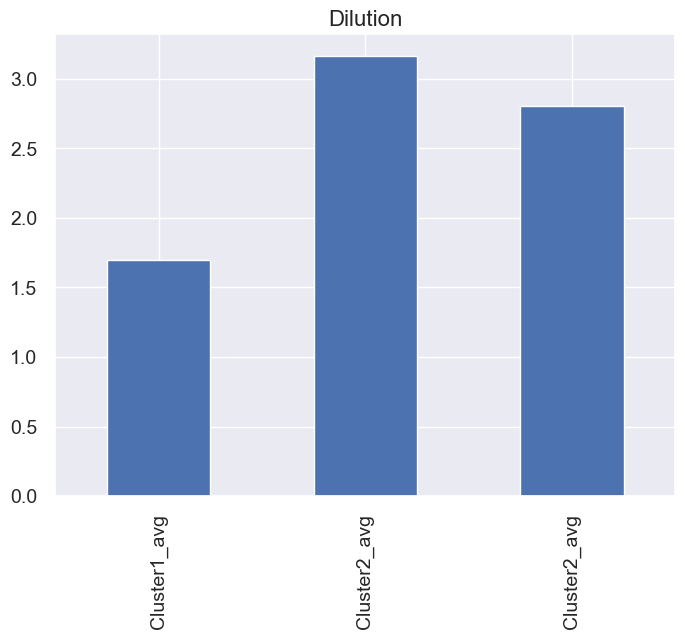

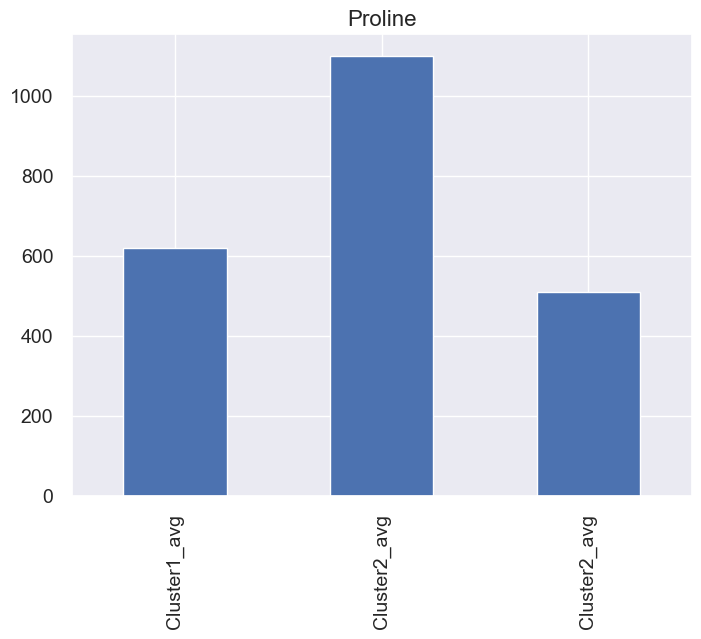

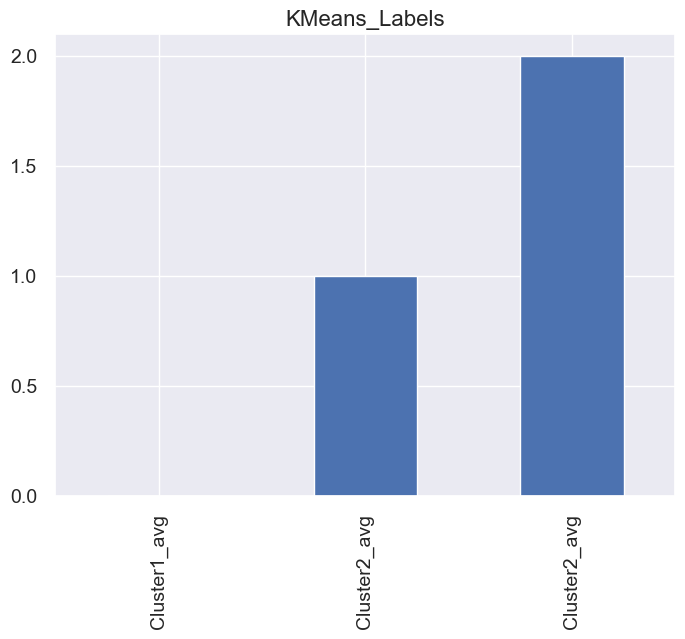

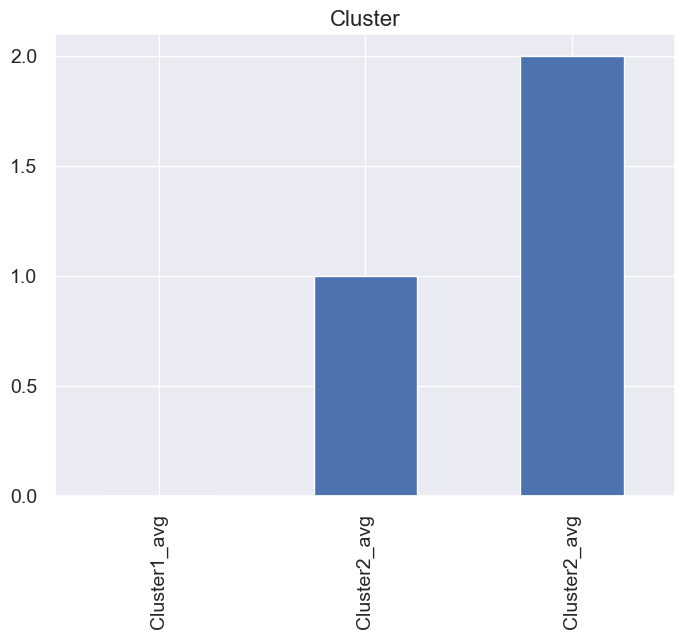

In [41]:
# Extract and plot one Column data .xs method
for i ,row in Avg_df.iterrows():
    fig=plt.subplots(figsize=(8,6))
    j=Avg_df.xs(i ,axis=0)
    plt.title(i,fontsize=16,fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

###### Comparing Kmeans Clusters with the Original Classified Dataset using "Type" Feature

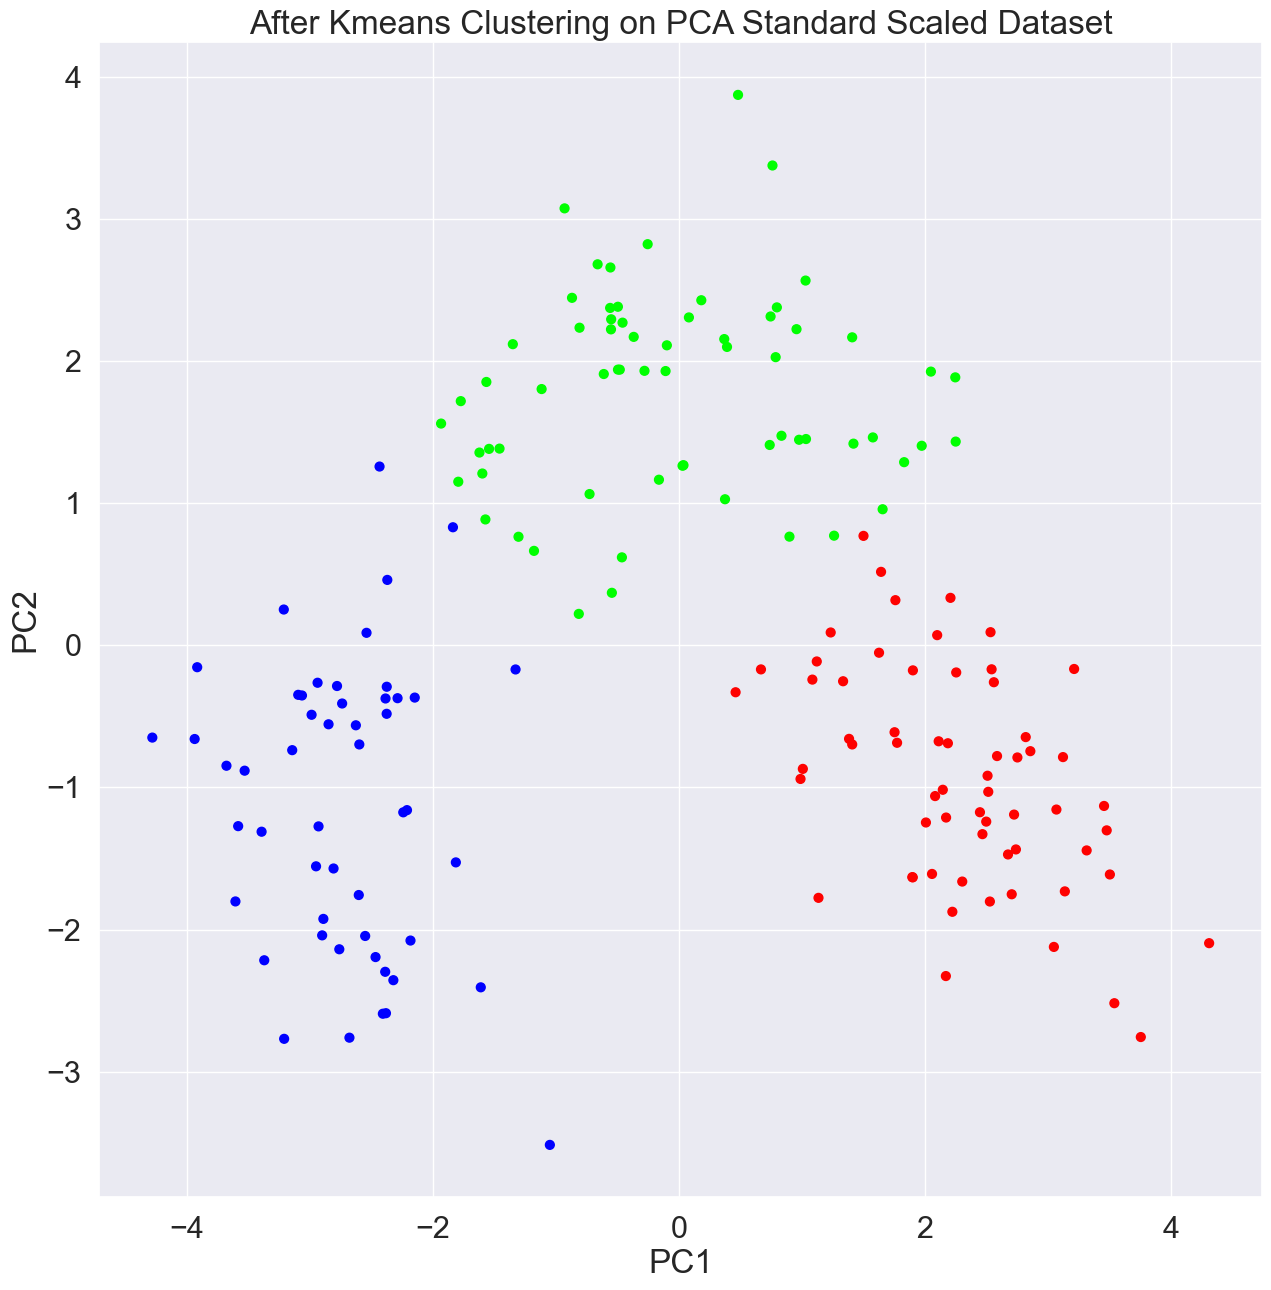

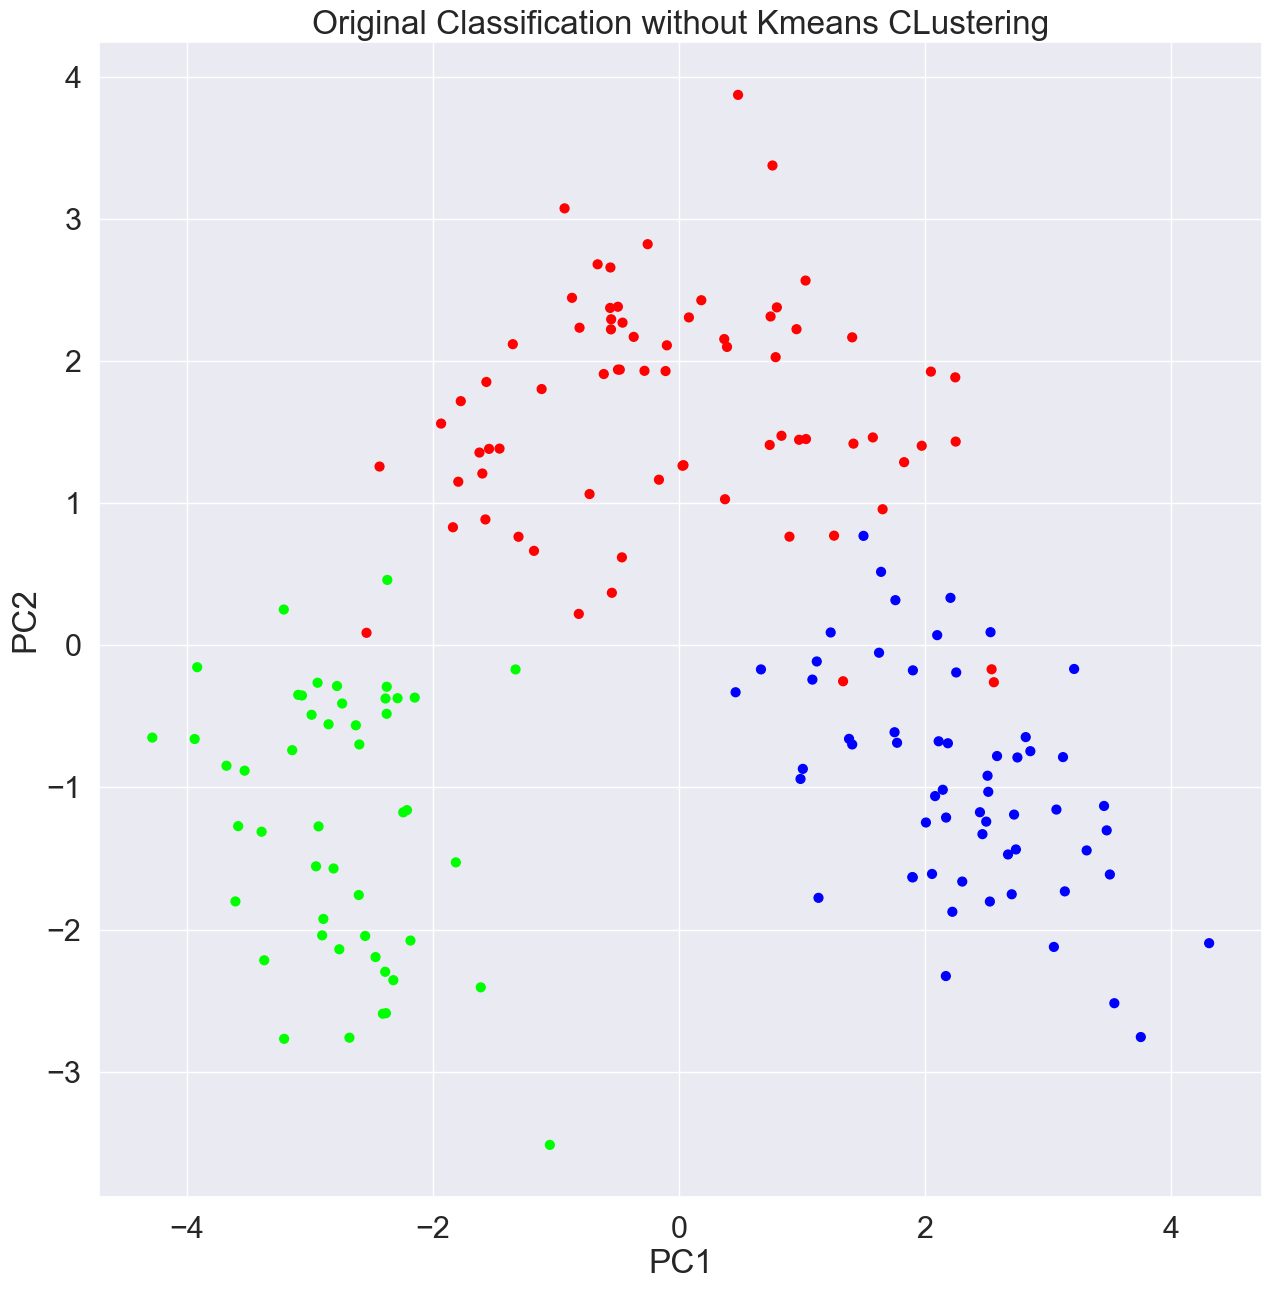

In [42]:
# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['KMeans_Labels'],cmap="brg",s=40)

# Aesthetics
plt.title('After Kmeans Clustering on PCA Standard Scaled Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['Type'],cmap="brg",s=40)

# Aesthetics
plt.title('Original Classification without Kmeans CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [43]:
# Group data by Clusters (K=3)
display('After Applying PCA and Kmens CLustering on Dataset',Wine_data.groupby('KMeans_Labels').agg(['mean']),'Original Classified Dataset',Wine_data.groupby('Type').agg(['mean']))

'After Applying PCA and Kmens CLustering on Dataset'

Type    Alcohol     Malic       Ash Alcalinity   Magnesium  \
                   mean       mean      mean      mean       mean        mean   
KMeans_Labels                                                                   
0              2.941176  13.134118  3.307255  2.417647  21.241176   98.666667   
1              1.048387  13.676774  1.997903  2.466290  17.462903  107.967742   
2              2.000000  12.250923  1.897385  2.231231  20.063077   92.738462   

                Phenols Flavanoids Nonflavanoids Proanthocyanins     Color  \
                   mean       mean          mean            mean      mean   
KMeans_Labels                                                                
0              1.683922   0.818824      0.451961        1.145882  7.234706   
1              2.847581   3.003226      0.292097        1.922097  5.453548   
2              2.247692   2.050000      0.357692        1.624154  2.973077   

                    Hue  Dilution      Proline  
                   mean      mean         mean  
KMeans_Labels                                   
0              0.691961  1.696667   619.058824  
1              1.065484  3.163387  1100.225806  
2              1.062708  2.803385   510.169231

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline KMeans_Labels  
             mean          mean  
Type                             
1     1115.711864      1.000000  
2      519.507042      1.873239  
3      629.895833      0.000000

+ The Type 2 has been perfectly clustered and rest has negliglable amount of difference
+ We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column

###### t-SNE

In [44]:
from sklearn.manifold import TSNE

In [45]:
# t-SNE
tsne=TSNE(n_components=2)
X_tsne=tsne.fit_transform(std_data)

# Convert to data frame
tsne_df=pd.DataFrame(data=X_tsne,columns= ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


tsne comp. 1  tsne comp. 2
0    -12.419848      4.371580
1     -8.704101      3.953960
2    -10.305081      8.376313
3    -12.954626      7.173162
4     -6.399952      9.421112

t-SNE plot in 2D coloured by class

Like PCA, t-SNE is an unsupervised algorithm, however we will use the same k-Means clusters from before to colour code the data points.

Text(0, 0.5, 'tsne component 2')

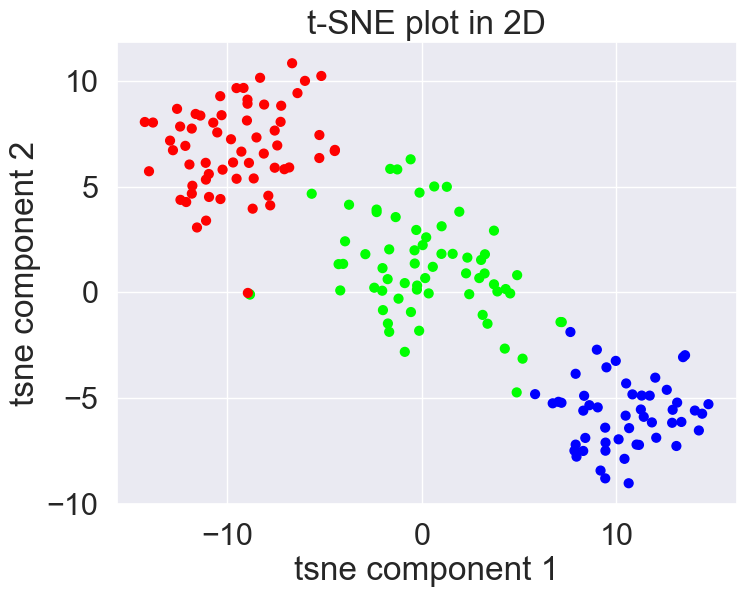

In [46]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0],tsne_df.iloc[:,1],c=Wine_data['KMeans_Labels'],cmap="brg",s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

###### Hierarchical Clustering 

In [47]:
import scipy.cluster.hierarchy as sch

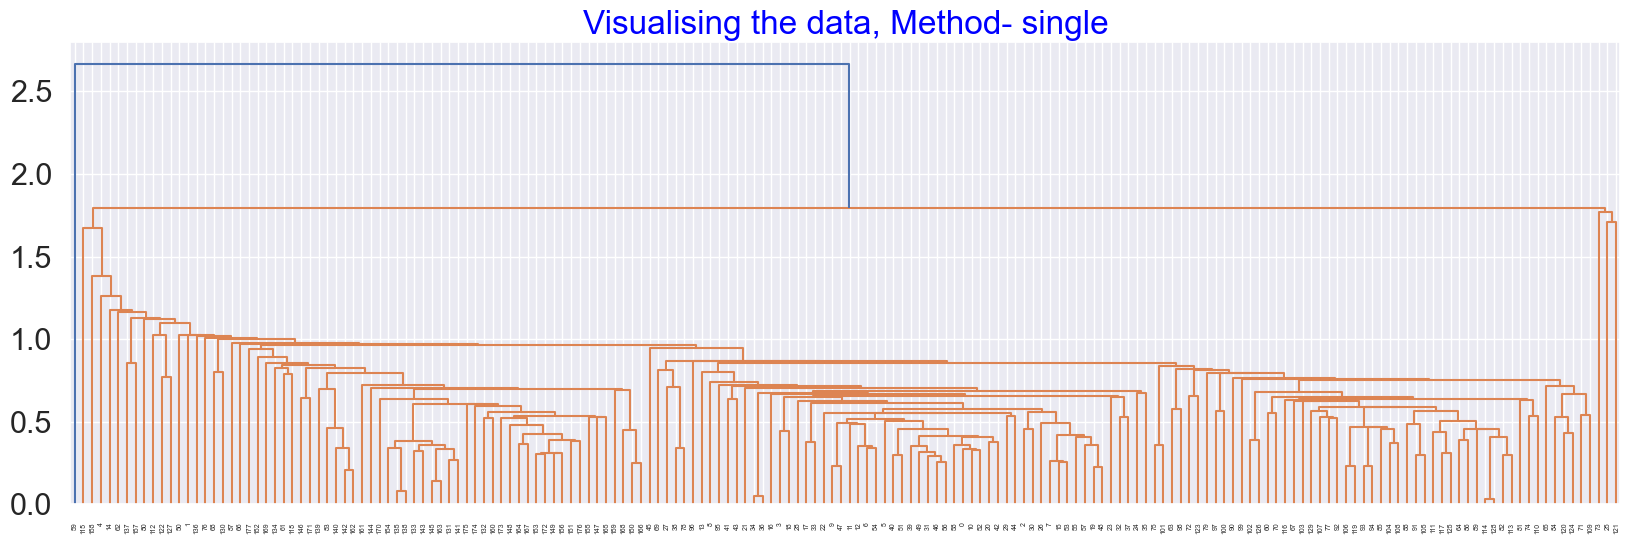

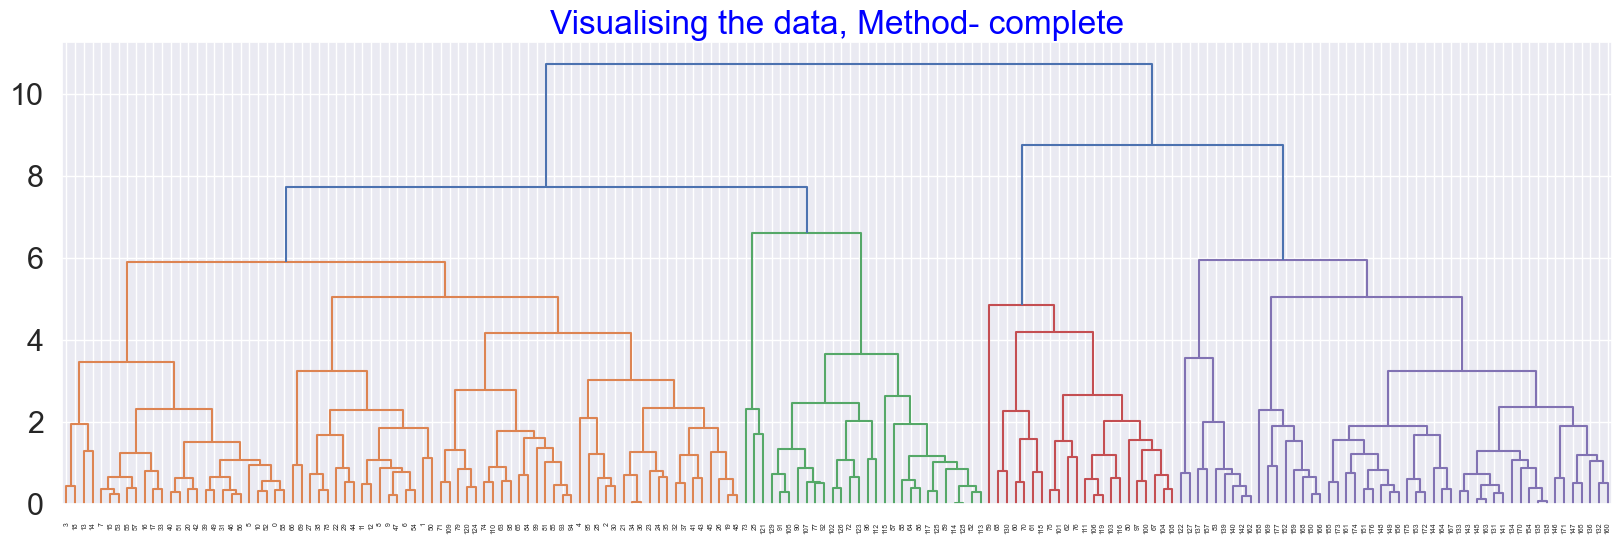

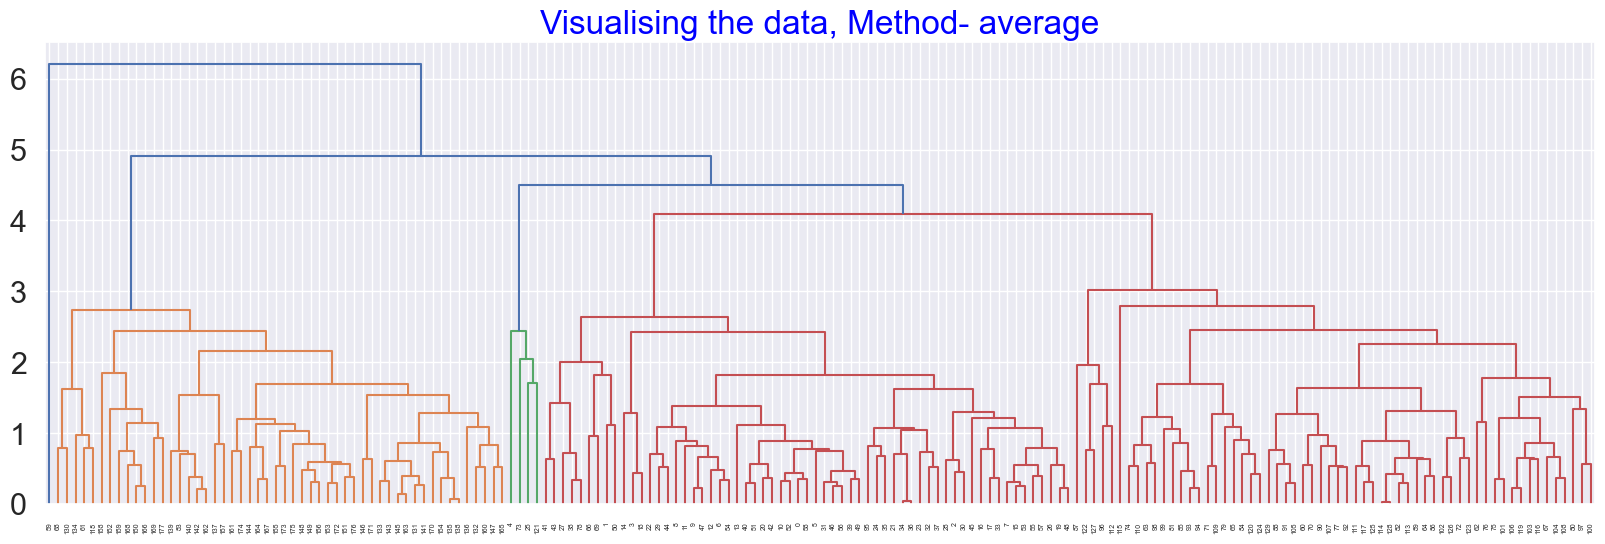

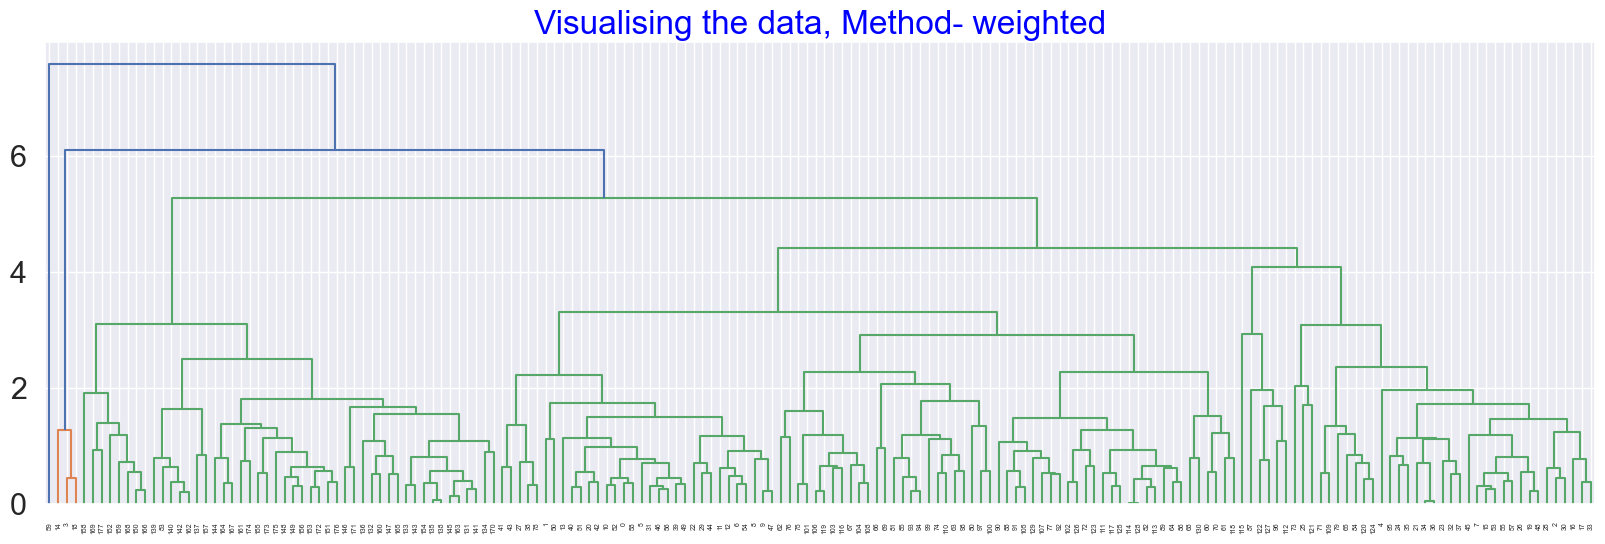

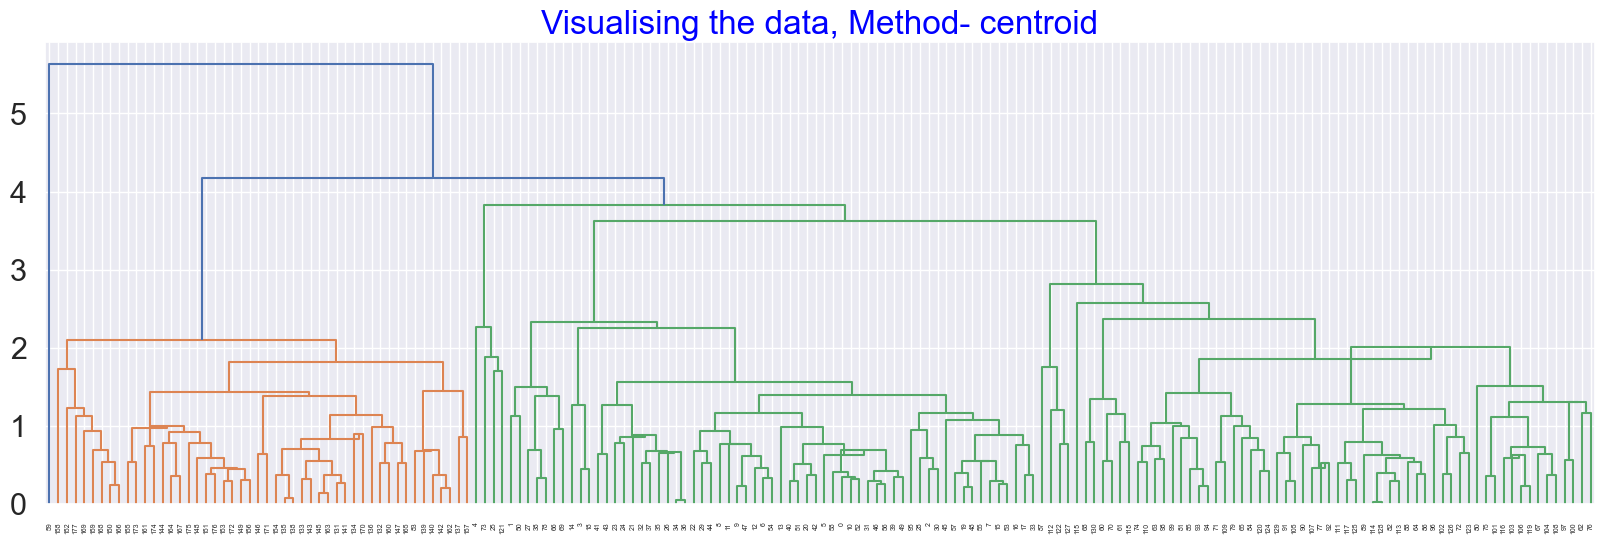

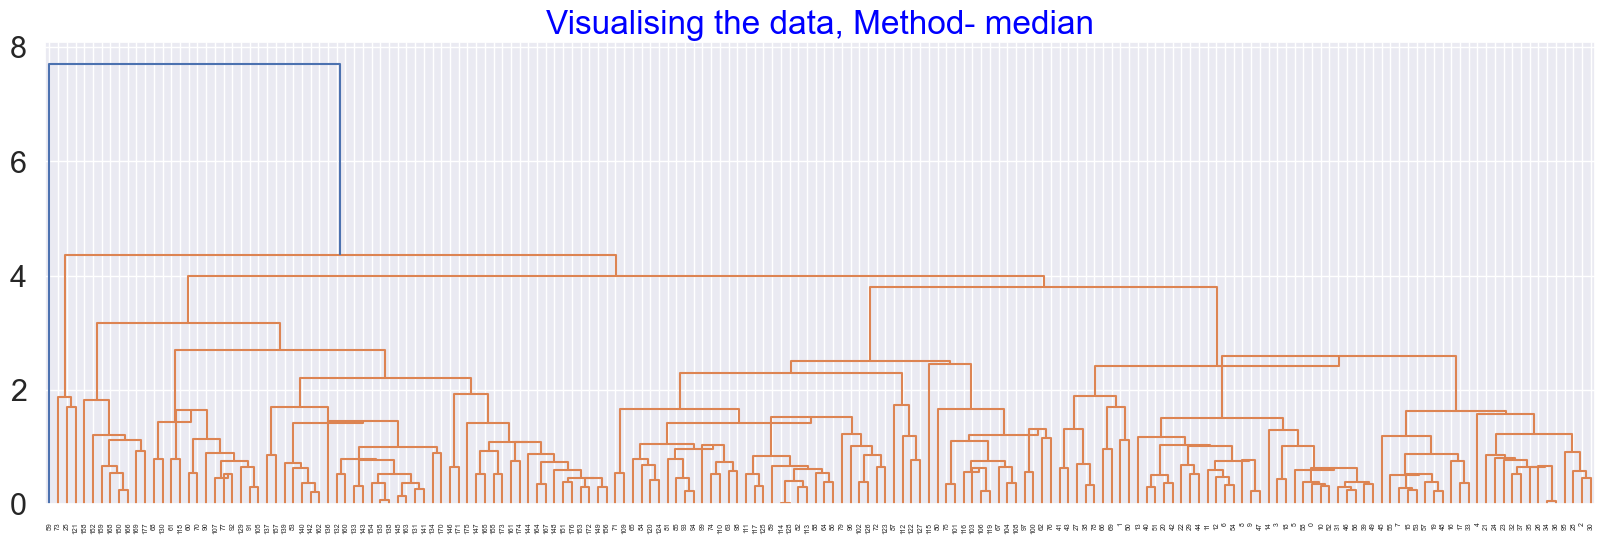

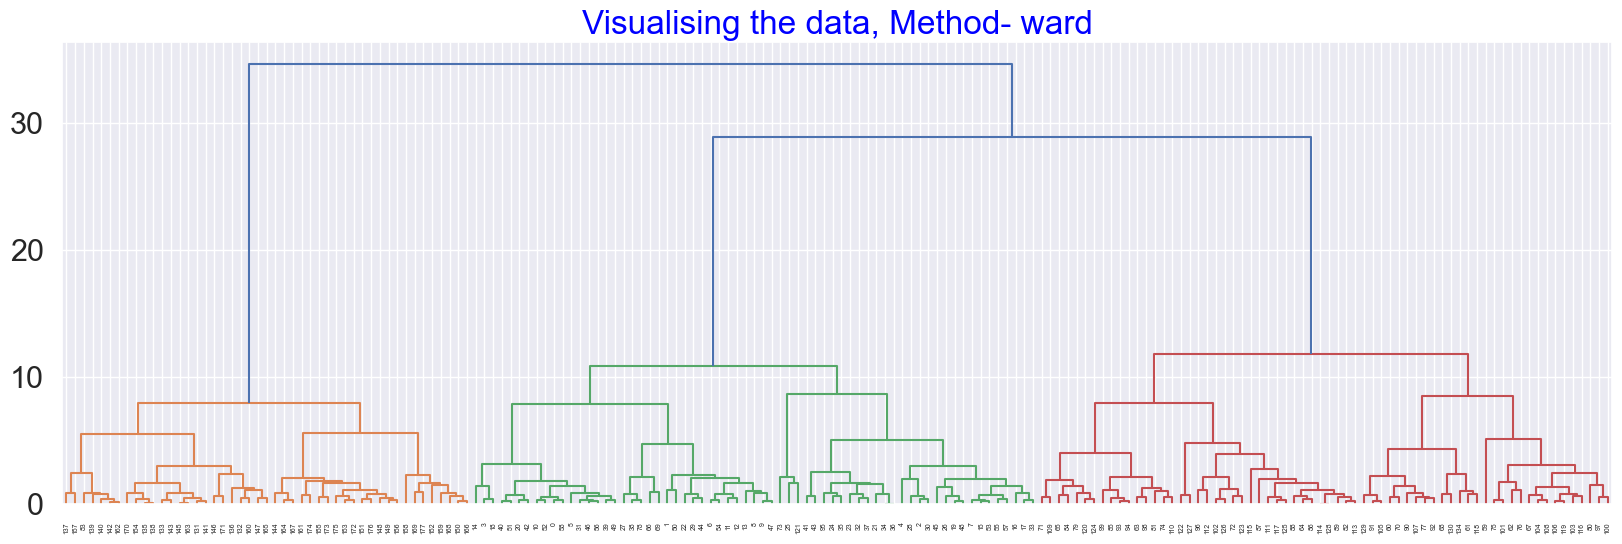

In [48]:
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize=(20,6)) 
    
    dict={'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict=dict) 
    Dendrogram1=sch.dendrogram(sch.linkage(pca_std_data, method=methods,optimal_ordering=False))

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
#Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters=[2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1=hie_cluster1.fit_predict(pca_std_data)
        silhouette_score1=sil(pca_std_data,hie_labels1)
        print("For n_clusters =",n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.39509037225075383
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- average : 0.3631067305104147
For n_clusters = 2 The average silhouette_score with linkage- single : 0.3631067305104147

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4459492198062967
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.28750089351606367
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3867254520074774
For n_clusters = 3 The average silhouette_score with linkage- single : 0.21662871644125858

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.38195690348144384
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3578484268567307
For n_clusters = 4 The average silhouette_score with linkage- average : 0.3217313131119776


In [51]:
#Applying Different Linkages using Different Distance Methods
n_clusters=[2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single"]:
        for affinities in ["euclidean","l1", "l2","manhattan","cosine"]:
            hie_cluster1=AgglomerativeClustering(n_clusters=n_clusters,affinity=affinities,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1=hie_cluster1.fit_predict(pca_std_data)
            silhouette_score1=sil(pca_std_data,hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.32546865442450856
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.3861976738993028
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.3326300750899872

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.3631067305104147
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.3631067305104147
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.3631067305104147
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.36310

For n_clusters = 7 The average silhouette_score with linkage- single and Affinity- l2 : -0.10255716440985138
For n_clusters = 7 The average silhouette_score with linkage- single and Affinity- manhattan : -0.23430206934794076
For n_clusters = 7 The average silhouette_score with linkage- single and Affinity- cosine : -0.10063743011163931

For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.2675496836392116
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- l1 : 0.20328791339442
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- l2 : 0.2675496836392116
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.20328791339442
For n_clusters = 8 The average silhouette_score with linkage- complete and Affinity- cosine : 0.2740415261834101

For n_clusters = 8 The average silhouette_score with linkage- average and Affinity- euclidean : 0.290

+ For n_clusters=4 the average silhouette_score with linkage-average and Affinity- l1 :0.4460725434202826
+ For n_clusters=5 the average silhouette_score with linkage- average and Affinity- euclidean : 0.4465449278023581    
+ For n_clusters=3 the average silhouette_score with linkage- ward :0.4459492198062967

In [52]:
agg_model=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
agg_model.fit(pca_std_data)
labels=agg_model.labels_

In [53]:
labels

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 2, 0, 0, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [54]:
# Cluster numbers
agg_model.n_clusters_

5

In [55]:
# Clustering Score
(sil(pca_std_data,agg_model.labels_)*100).round(3)

44.654

In [56]:
#Putting Cluster lables into original dataset And analysis of the same
# Concating Labels with main dataset copy
Wine_data['Hierarchical_Labels']=labels
Wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   KMeans_Labels  Hierarchical_Labels  
0              1                    1  
1              1                    1  
2              1                    1  
3              1                    1  
4              1                    4

In [57]:
Wine_data.groupby('Hierarchical_Labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_Labels                                                       
0                    2.000000  12.215833  1.971000  2.265167  20.498333   
1                    1.065574  13.684754  1.945902  2.399836  16.800000   
2                    2.923077  13.138077  3.261731  2.416538  21.159615   
3                    2.000000  12.370000  0.940000  1.360000  10.600000   
4                    1.500000  12.710000  2.090000  2.980000  26.125000   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_Labels                                                  
0                     91.083333  2.247667   2.084500      0.361167   
1                    107.524590  2.809344   2.937213      0.283934   
2                     98.884615  1.700192   0.828077      0.453846   
3                     88.000000  1.980000   0.570000      0.280000   
4                    125.000000  2.977500   3.335000      0.385000   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_Labels                                                 
0                          1.619833  2.943000  1.059100  2.831833   
1                          1.953115  5.449508  1.067377  3.137213   
2                          1.131923  7.156538  0.698269  1.701154   
3                          0.420000  1.950000  1.050000  1.820000   
4                          1.892500  4.312500  1.102500  3.330000   

                         Proline KMeans_Labels  
                            mean          mean  
Hierarchical_Labels                             
0                     498.683333      2.000000  
1                    1101.131148      1.049180  
2                     621.576923      0.038462  
3                     520.000000      2.000000  
4                     753.750000      1.000000

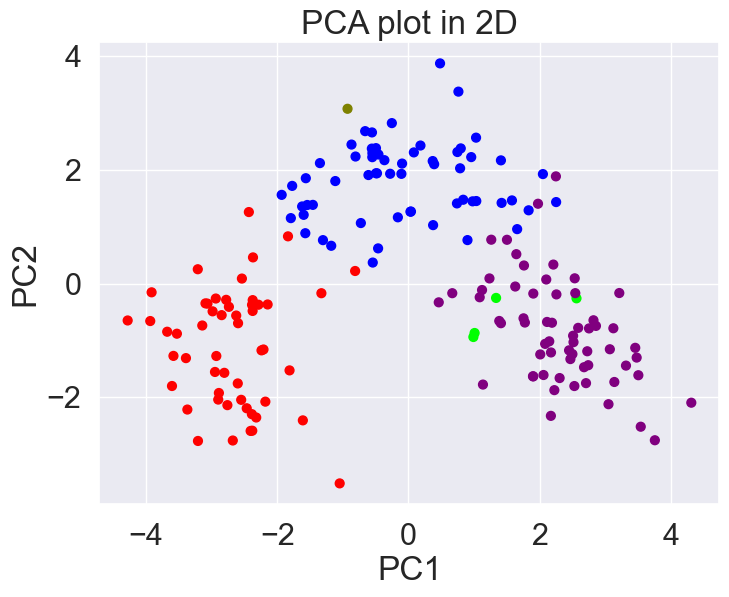

In [58]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0], pca_std_data.iloc[:,1],c=Wine_data['Hierarchical_Labels'],cmap="brg",s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

###### Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

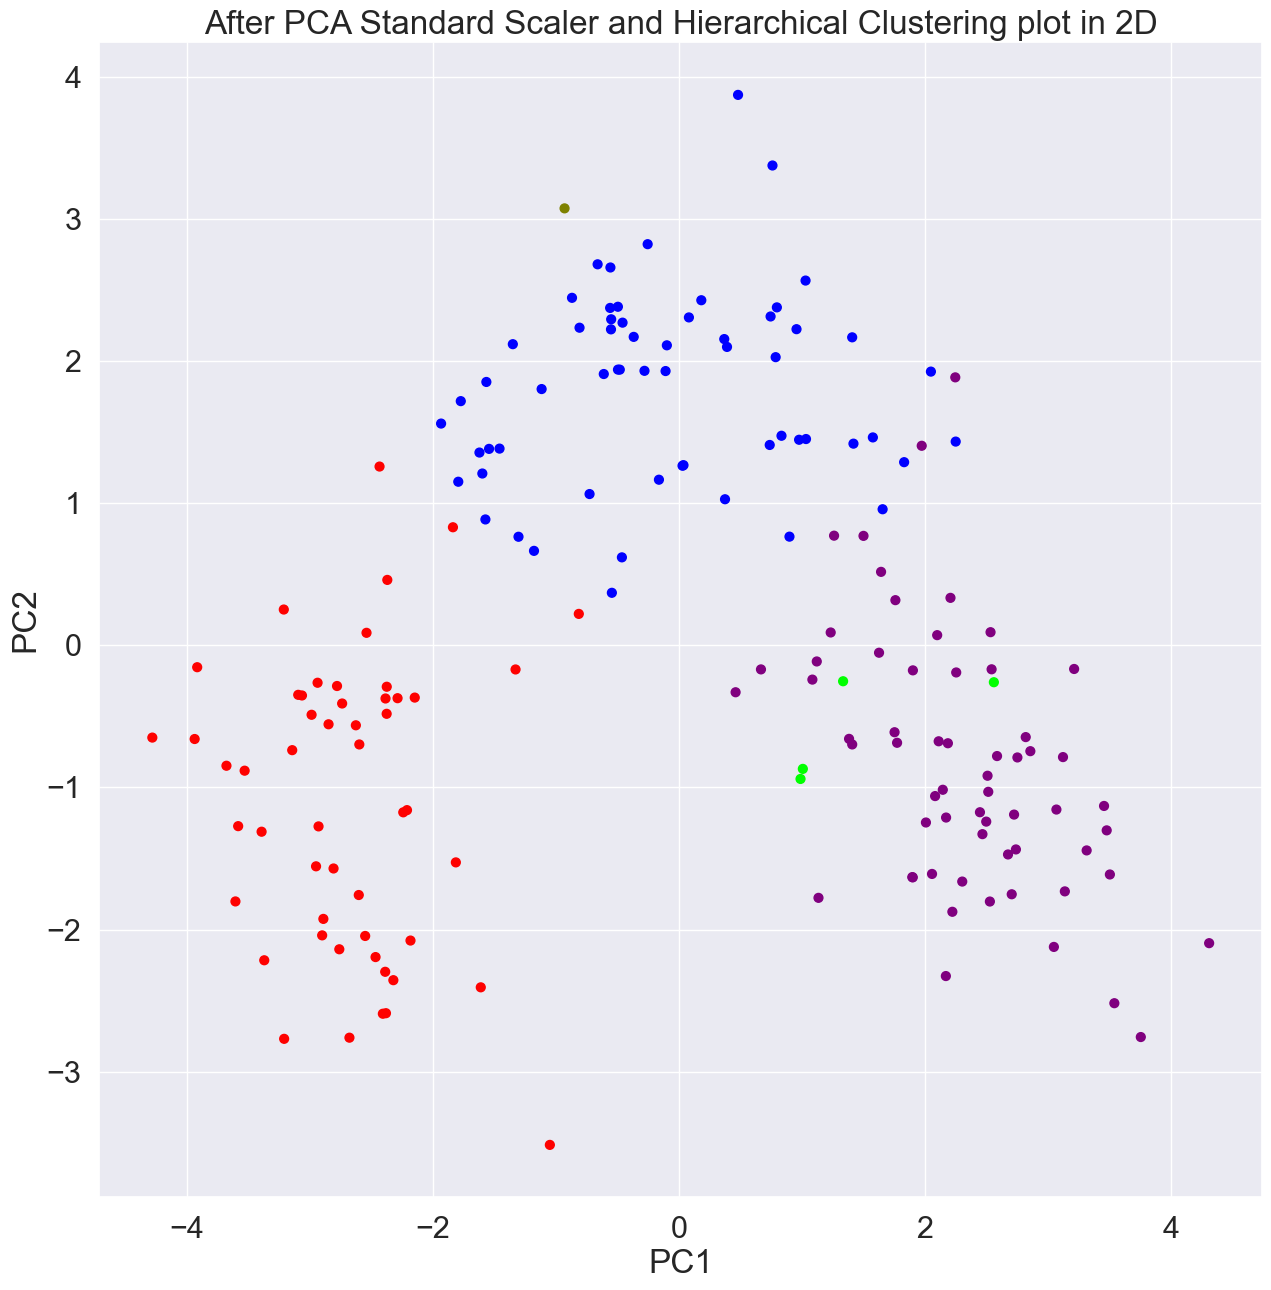

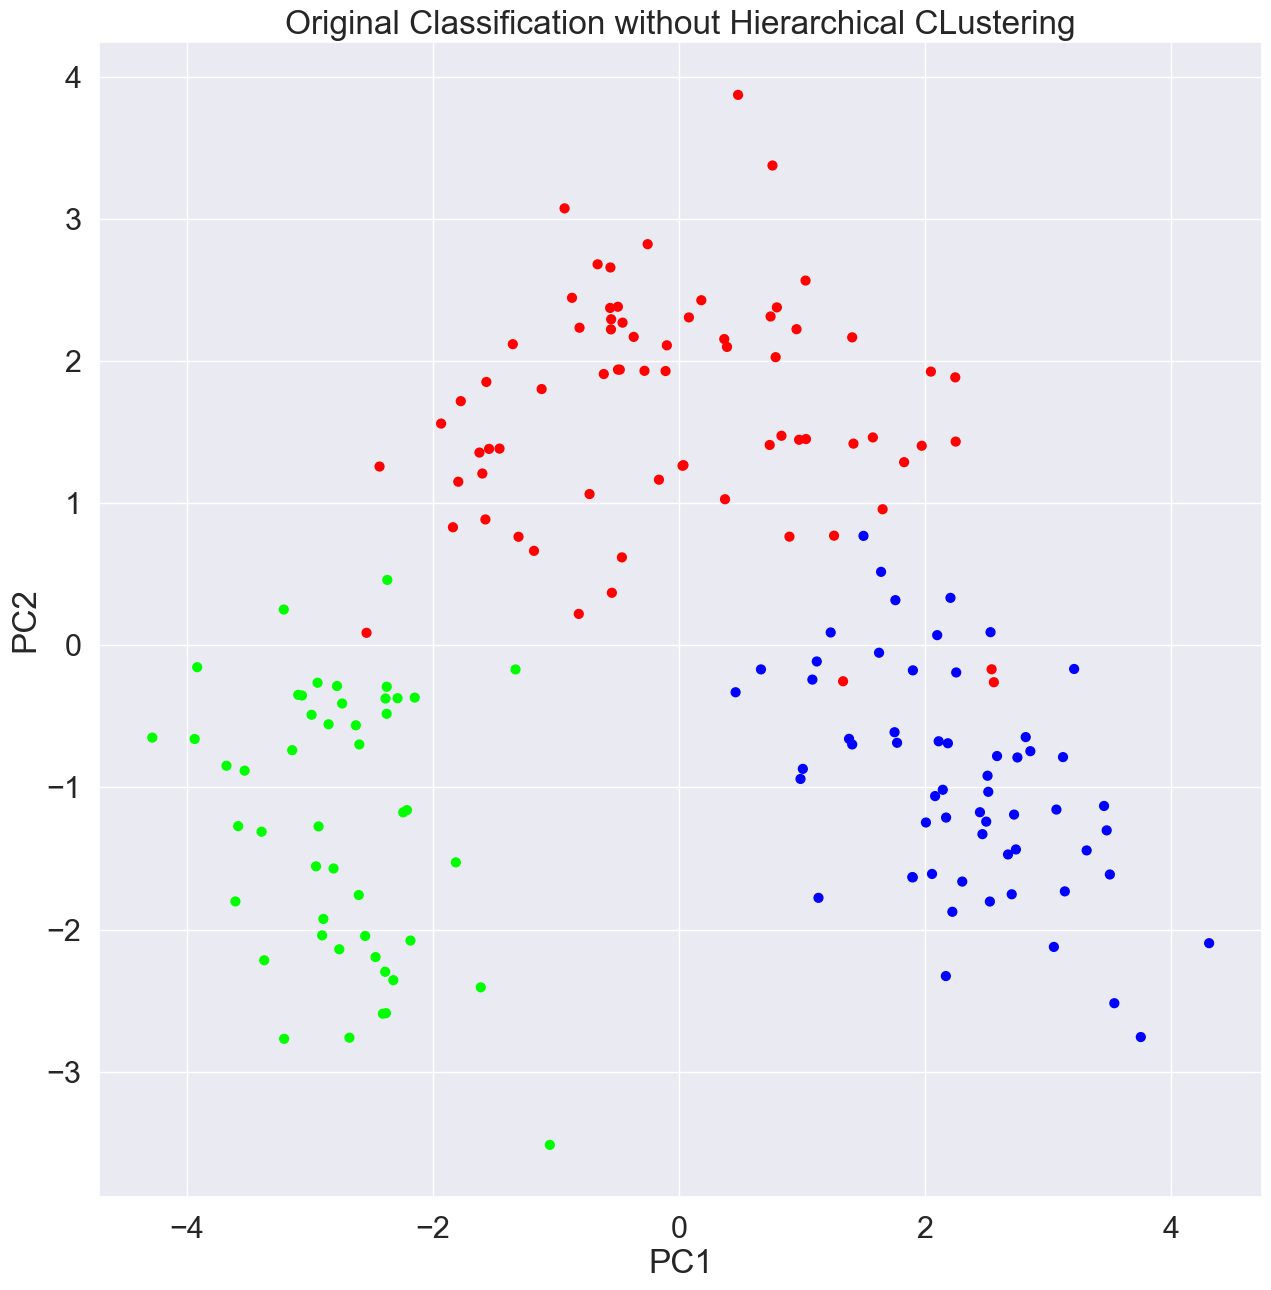

In [59]:
# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['Hierarchical_Labels'],cmap="brg",s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['Type'],cmap="brg",s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [60]:
# Group data by Clusters
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',Wine_data.groupby('Hierarchical_Labels').agg(['mean']),'Original Classified Dataset',Wine_data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_Labels                                                       
0                    2.000000  12.215833  1.971000  2.265167  20.498333   
1                    1.065574  13.684754  1.945902  2.399836  16.800000   
2                    2.923077  13.138077  3.261731  2.416538  21.159615   
3                    2.000000  12.370000  0.940000  1.360000  10.600000   
4                    1.500000  12.710000  2.090000  2.980000  26.125000   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_Labels                                                  
0                     91.083333  2.247667   2.084500      0.361167   
1                    107.524590  2.809344   2.937213      0.283934   
2                     98.884615  1.700192   0.828077      0.453846   
3                     88.000000  1.980000   0.570000      0.280000   
4                    125.000000  2.977500   3.335000      0.385000   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_Labels                                                 
0                          1.619833  2.943000  1.059100  2.831833   
1                          1.953115  5.449508  1.067377  3.137213   
2                          1.131923  7.156538  0.698269  1.701154   
3                          0.420000  1.950000  1.050000  1.820000   
4                          1.892500  4.312500  1.102500  3.330000   

                         Proline KMeans_Labels  
                            mean          mean  
Hierarchical_Labels                             
0                     498.683333      2.000000  
1                    1101.131148      1.049180  
2                     621.576923      0.038462  
3                     520.000000      2.000000  
4                     753.750000      1.000000

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline KMeans_Labels Hierarchical_Labels  
             mean          mean                mean  
Type                                                 
1     1115.711864      1.000000            1.101695  
2      519.507042      1.873239            0.323944  
3      629.895833      0.000000            2.000000

In [61]:
Agg_model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
Agg_model.fit(pca_std_data)
labels=Agg_model.labels_

In [62]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [63]:
# Cluster numbers
Agg_model.n_clusters_

3

In [64]:
# Clustering Score
(sil(pca_std_data,Agg_model.labels_)*100).round(3)

44.595

In [65]:
#Putting Cluster lables into original dataset And analysis of the same
# Concating Labels with main dataset copy
Wine_data['Hierarchical_labels']=labels
Wine_data.head()

Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  \
0           0.28             2.29   5.64  1.04      3.92     1065   
1           0.26             1.28   4.38  1.05      3.40     1050   
2           0.30             2.81   5.68  1.03      3.17     1185   
3           0.24             2.18   7.80  0.86      3.45     1480   
4           0.39             1.82   4.32  1.04      2.93      735   

   KMeans_Labels  Hierarchical_Labels  Hierarchical_labels  
0              1                    1                    2  
1              1                    1                    2  
2              1                    1                    2  
3              1                    1                    2  
4              1                    4                    2

In [66]:
Wine_data.groupby('Hierarchical_labels').agg(['mean'])

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.030303  12.264242  1.932121  2.245455  20.087879   
1                    2.978723  13.171489  3.431702  2.441064  21.595745   
2                    1.092308  13.624769  1.954769  2.435538  17.373846   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                     91.666667  2.220152   1.991364      0.367727   
1                     98.829787  1.674894   0.792979      0.452766   
2                    108.600000  2.819692   2.961692      0.290154   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                          1.540455  3.036364  1.042515  2.729848   
1                          1.165957  7.452553  0.682979  1.702553   
2                          1.949385  5.379538  1.069538  3.149077   

                         Proline KMeans_Labels Hierarchical_Labels  
                            mean          mean                mean  
Hierarchical_labels                                                 
0                     504.439394      1.878788            0.196970  
1                     627.021277      0.000000            2.000000  
2                    1079.753846      1.046154            1.184615

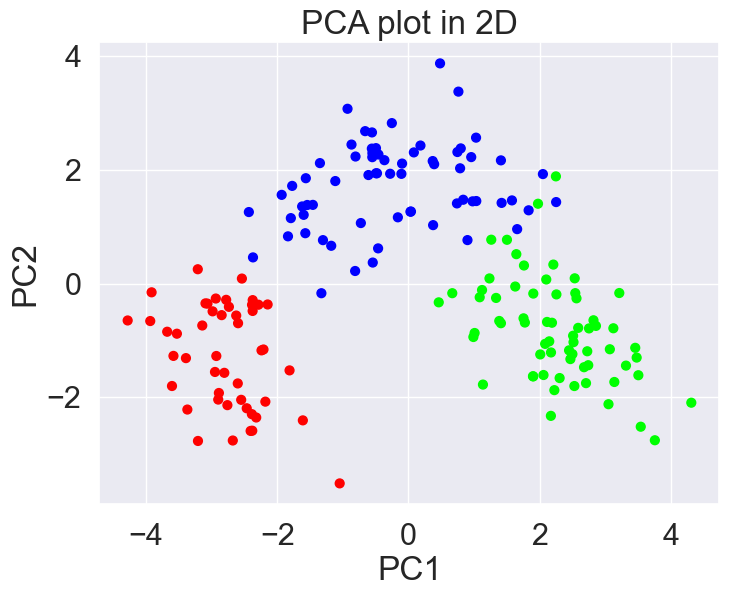

In [67]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0], pca_std_data.iloc[:,1],c=Wine_data['Hierarchical_labels'],cmap="brg",s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

 We can now clearly see the 3 number of clusters formed

###### Comparing Hierarchical Clusters with the Original Classified Dataset using "Type" Feature

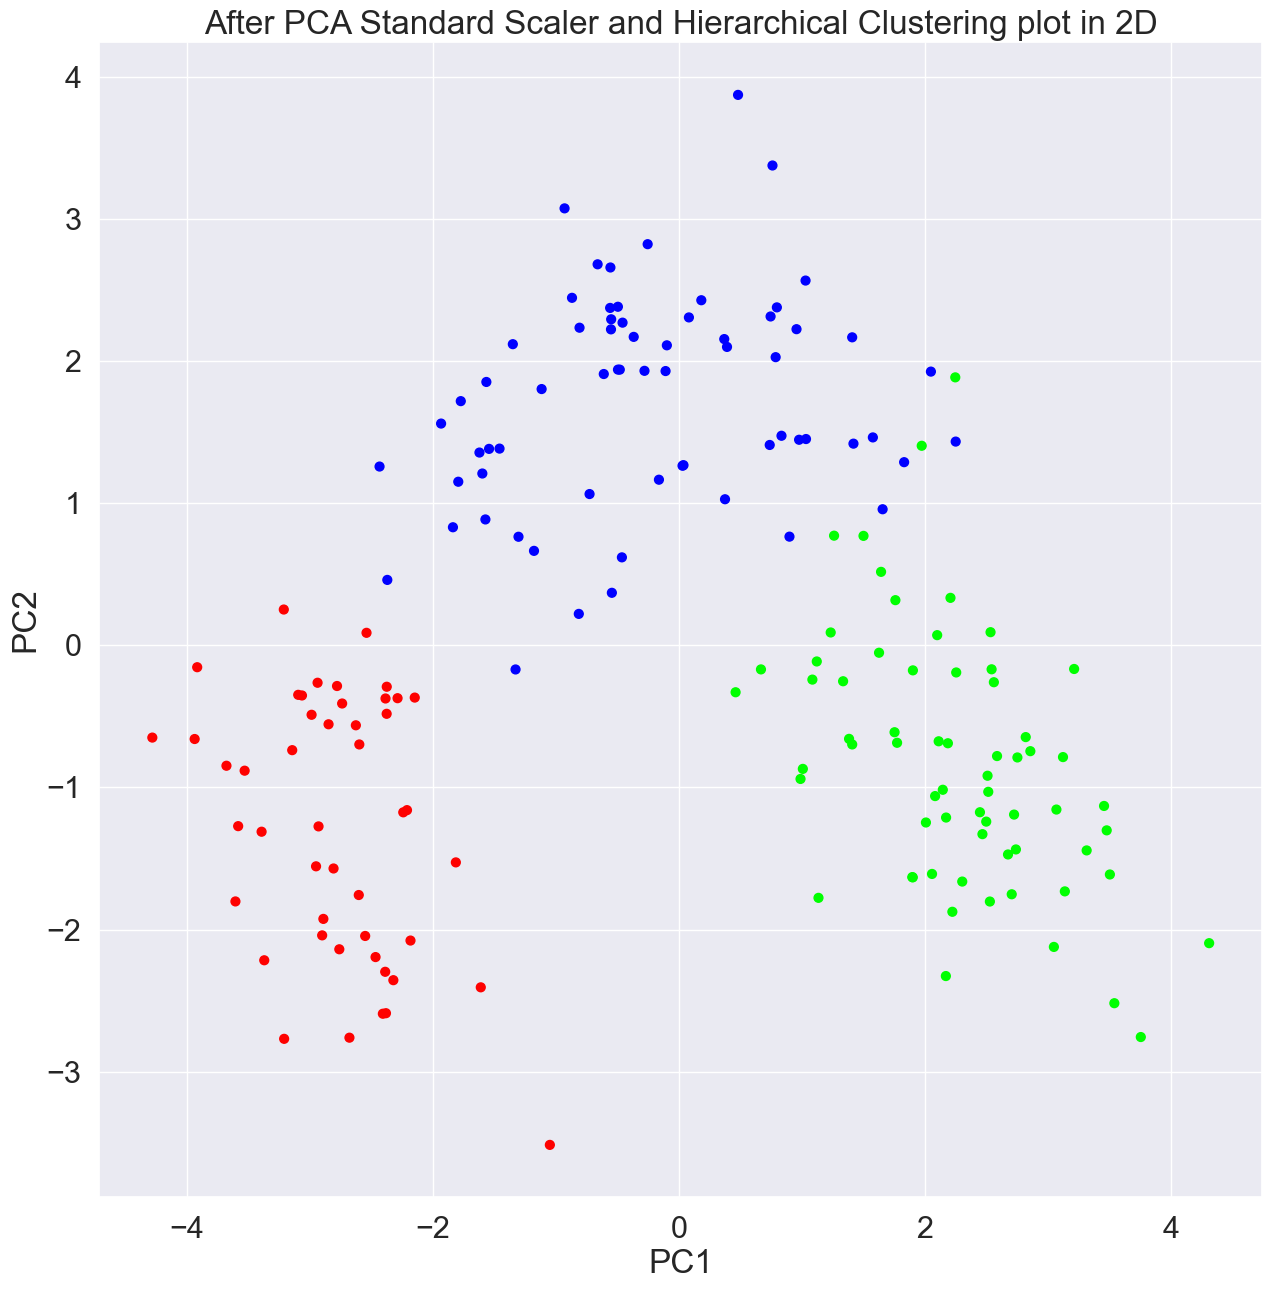

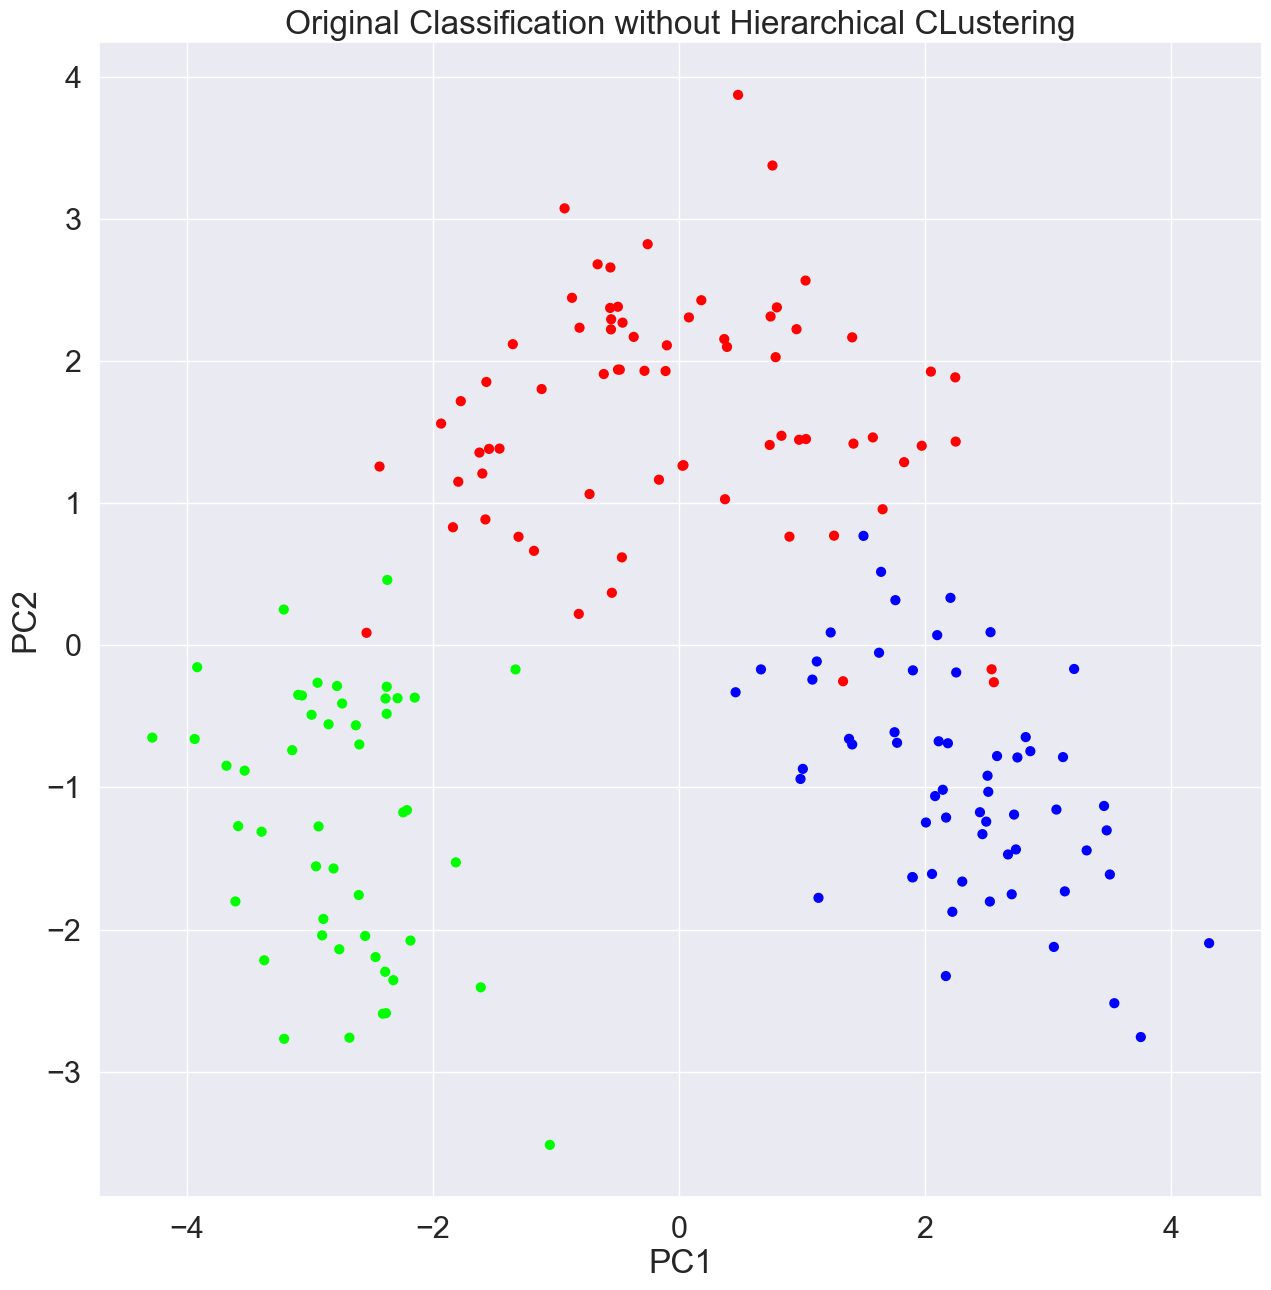

In [68]:
# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['Hierarchical_labels'],cmap="brg",s=40)

# Aesthetics
plt.title('After PCA Standard Scaler and Hierarchical Clustering plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Scatterplot
plt.scatter(pca_std_data.iloc[:,0],pca_std_data.iloc[:,1],c=Wine_data['Type'],cmap="brg",s=40)

# Aesthetics
plt.title('Original Classification without Hierarchical CLustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [69]:
# Group data by Clusters
display('After Applying Hierarchical Clustering on PCA Standard Scaled Dataset',Wine_data.groupby('Hierarchical_labels').agg(['mean']),'Original Classified Dataset',Wine_data.groupby('Type').agg(['mean']))

'After Applying Hierarchical Clustering on PCA Standard Scaled Dataset'

Type    Alcohol     Malic       Ash Alcalinity  \
                         mean       mean      mean      mean       mean   
Hierarchical_labels                                                       
0                    2.030303  12.264242  1.932121  2.245455  20.087879   
1                    2.978723  13.171489  3.431702  2.441064  21.595745   
2                    1.092308  13.624769  1.954769  2.435538  17.373846   

                      Magnesium   Phenols Flavanoids Nonflavanoids  \
                           mean      mean       mean          mean   
Hierarchical_labels                                                  
0                     91.666667  2.220152   1.991364      0.367727   
1                     98.829787  1.674894   0.792979      0.452766   
2                    108.600000  2.819692   2.961692      0.290154   

                    Proanthocyanins     Color       Hue  Dilution  \
                               mean      mean      mean      mean   
Hierarchical_labels                                                 
0                          1.540455  3.036364  1.042515  2.729848   
1                          1.165957  7.452553  0.682979  1.702553   
2                          1.949385  5.379538  1.069538  3.149077   

                         Proline KMeans_Labels Hierarchical_Labels  
                            mean          mean                mean  
Hierarchical_labels                                                 
0                     504.439394      1.878788            0.196970  
1                     627.021277      0.000000            2.000000  
2                    1079.753846      1.046154            1.184615

'Original Classified Dataset'

Alcohol     Malic       Ash Alcalinity   Magnesium   Phenols  \
           mean      mean      mean       mean        mean      mean   
Type                                                                   
1     13.744746  2.010678  2.455593  17.037288  106.338983  2.840169   
2     12.278732  1.932676  2.244789  20.238028   94.549296  2.258873   
3     13.153750  3.333750  2.437083  21.416667   99.312500  1.678750   

     Flavanoids Nonflavanoids Proanthocyanins     Color       Hue  Dilution  \
           mean          mean            mean      mean      mean      mean   
Type                                                                          
1      2.982373      0.290000        1.899322  5.528305  1.062034  3.157797   
2      2.080845      0.363662        1.630282  3.086620  1.056282  2.785352   
3      0.781458      0.447500        1.153542  7.396250  0.682708  1.683542   

          Proline KMeans_Labels Hierarchical_Labels Hierarchical_labels  
             mean          mean                mean                mean  
Type                                                                     
1     1115.711864      1.000000            1.101695            2.000000  
2      519.507042      1.873239            0.323944            0.183099  
3      629.895833      0.000000            2.000000            0.958333

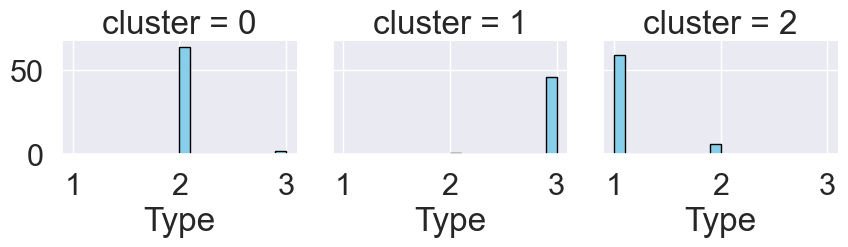

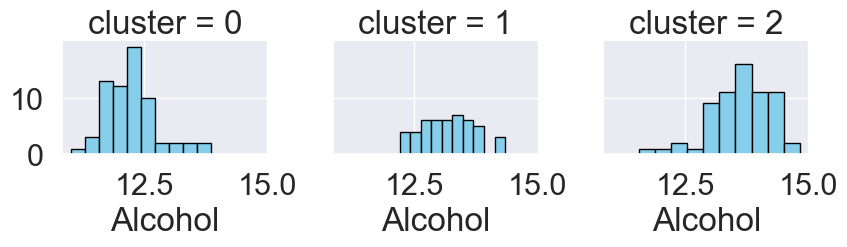

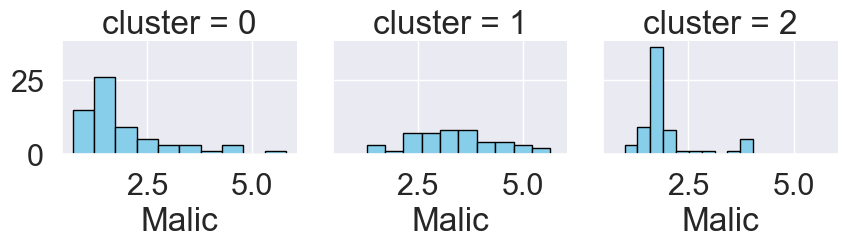

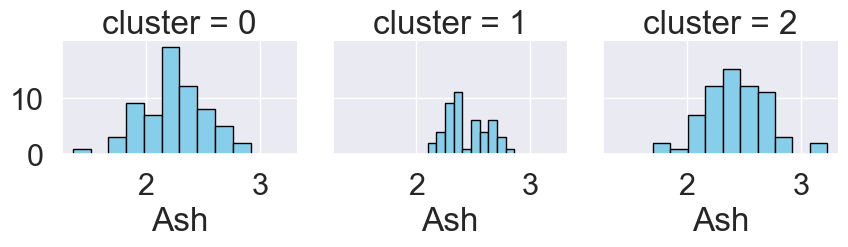

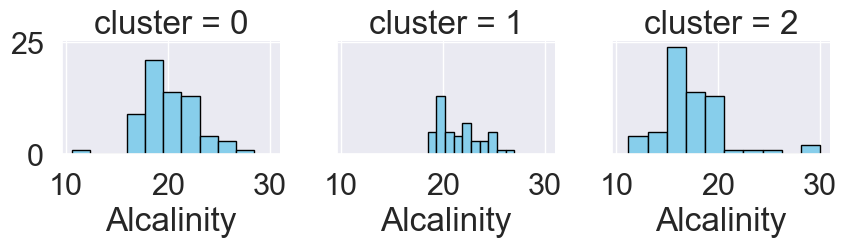

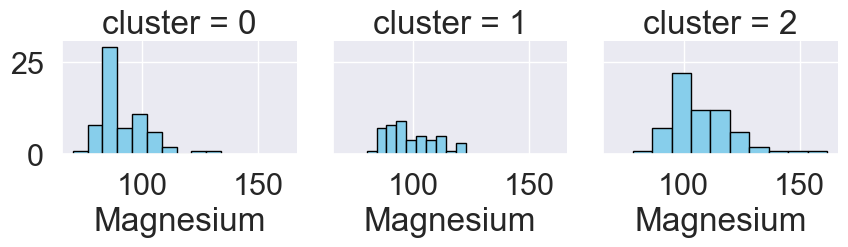

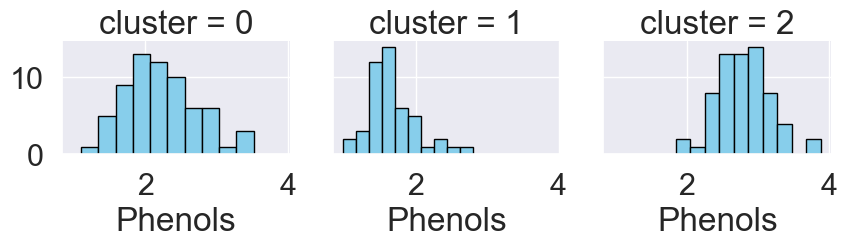

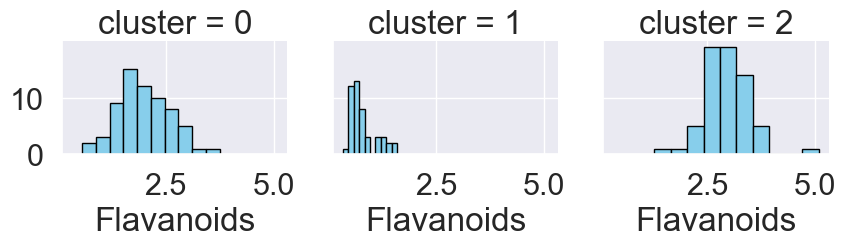

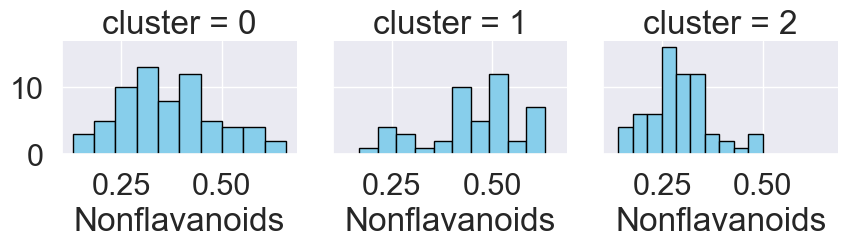

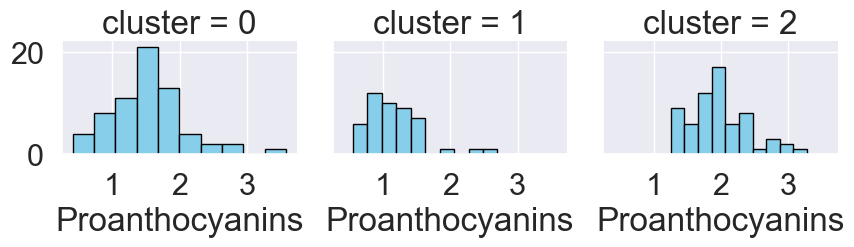

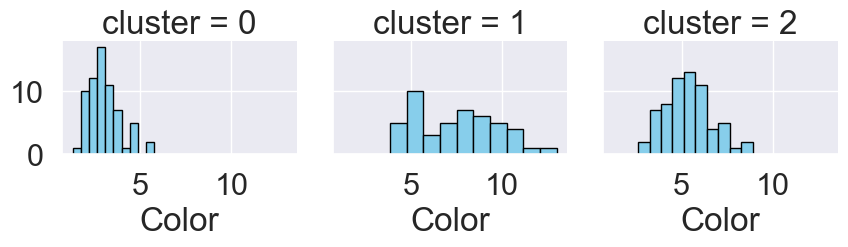

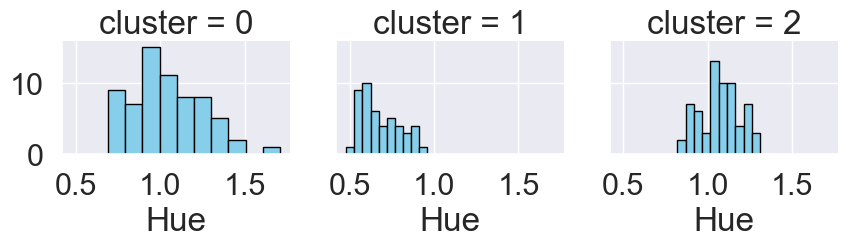

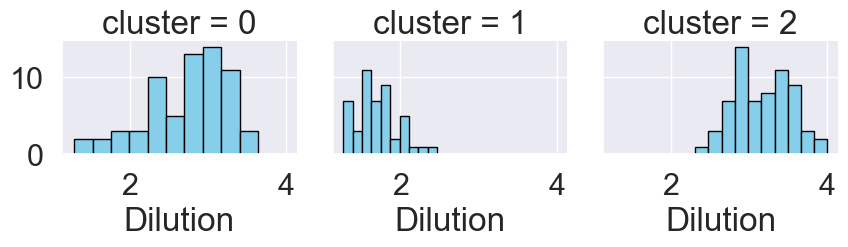

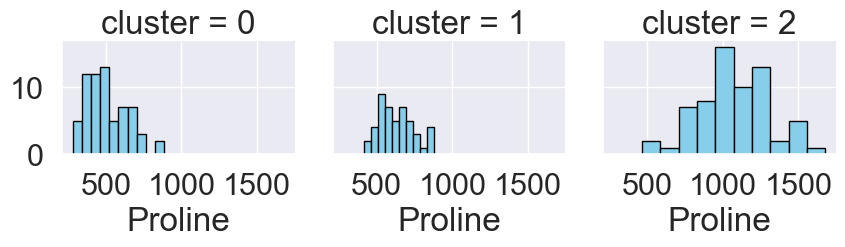

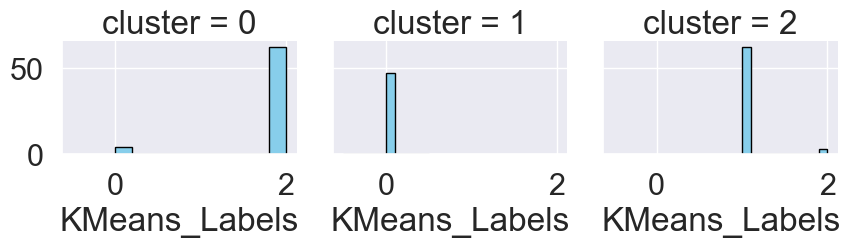

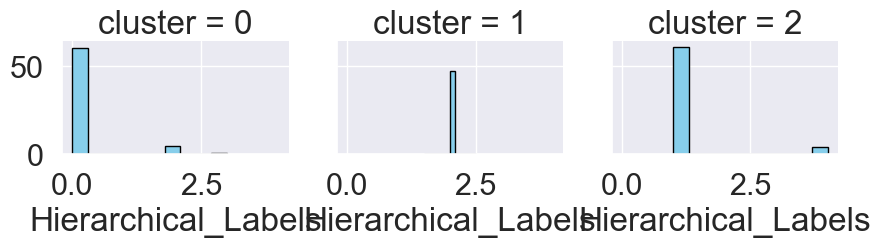

In [70]:
df2=Wine_data.copy()
df2.rename({"Hierarchical_labels":'cluster'},axis=1,inplace=True)

aux=df2.columns.tolist()
aux[0:len(aux)-1]

sns.set(style="darkgrid",rc={'figure.figsize':(13,8)}, font_scale=2)

for cluster in aux[0:len(aux)-1]:
    grid=sns.FacetGrid(df2,col="cluster")
    grid.map(plt.hist,cluster,color="skyblue",lw=1,edgecolor="black")

In [72]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1=pd.DataFrame(df2.loc[df2.cluster==0].mean(),columns=['cluster1_avg'])
cluster2=pd.DataFrame(df2.loc[df2.cluster==1].mean(),columns=['cluster2_avg'])
cluster3=pd.DataFrame(df2.loc[df2.cluster==2].mean(),columns=['cluster2_avg'])

In [73]:
Avg_df=pd.concat([cluster1,cluster2,cluster3],axis=1)
Avg_df

cluster1_avg  cluster2_avg  cluster2_avg
Type                     2.030303      2.978723      1.092308
Alcohol                 12.264242     13.171489     13.624769
Malic                    1.932121      3.431702      1.954769
Ash                      2.245455      2.441064      2.435538
Alcalinity              20.087879     21.595745     17.373846
Magnesium               91.666667     98.829787    108.600000
Phenols                  2.220152      1.674894      2.819692
Flavanoids               1.991364      0.792979      2.961692
Nonflavanoids            0.367727      0.452766      0.290154
Proanthocyanins          1.540455      1.165957      1.949385
Color                    3.036364      7.452553      5.379538
Hue                      1.042515      0.682979      1.069538
Dilution                 2.729848      1.702553      3.149077
Proline                504.439394    627.021277   1079.753846
KMeans_Labels            1.878788      0.000000      1.046154
Hierarchical_Labels      0.196970      2.000000      1.184615
cluster                  0.000000      1.000000      2.000000

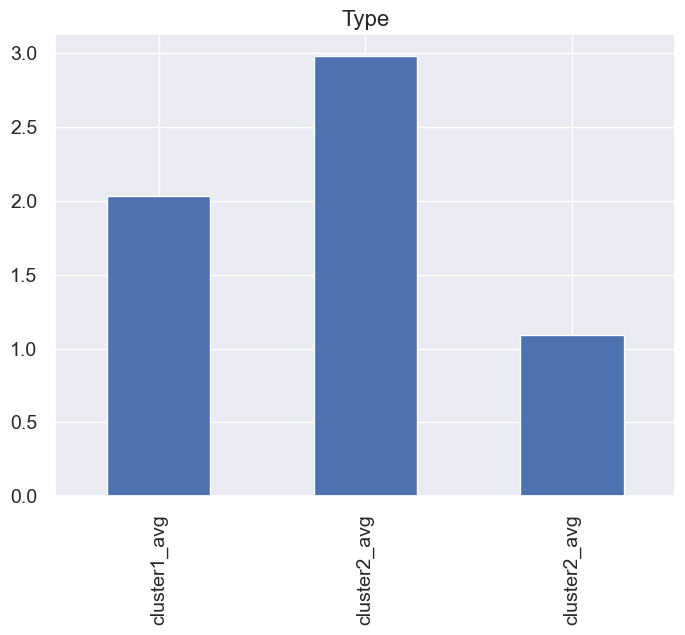

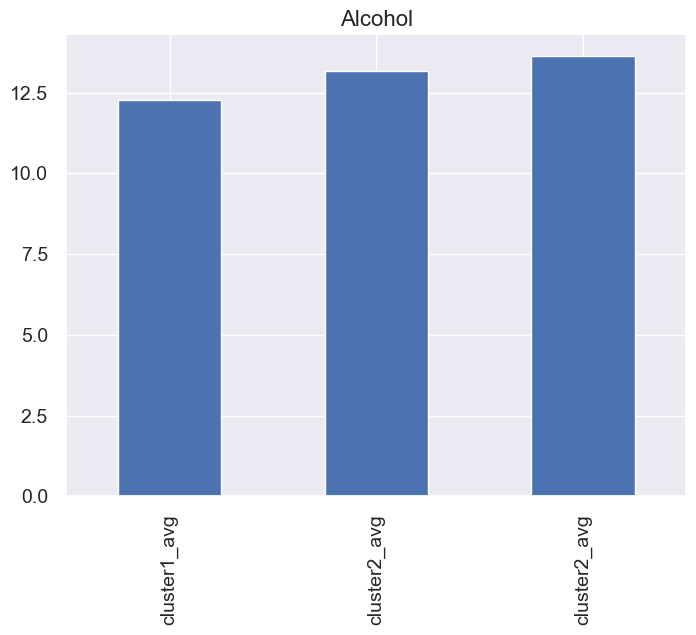

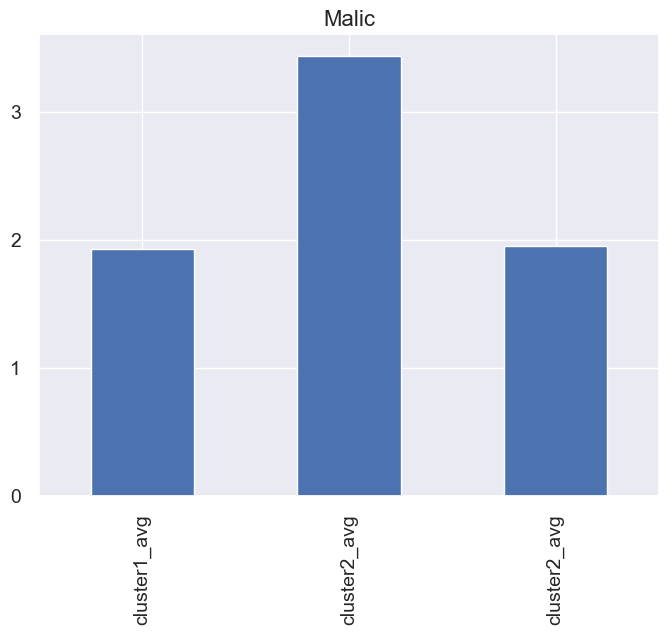

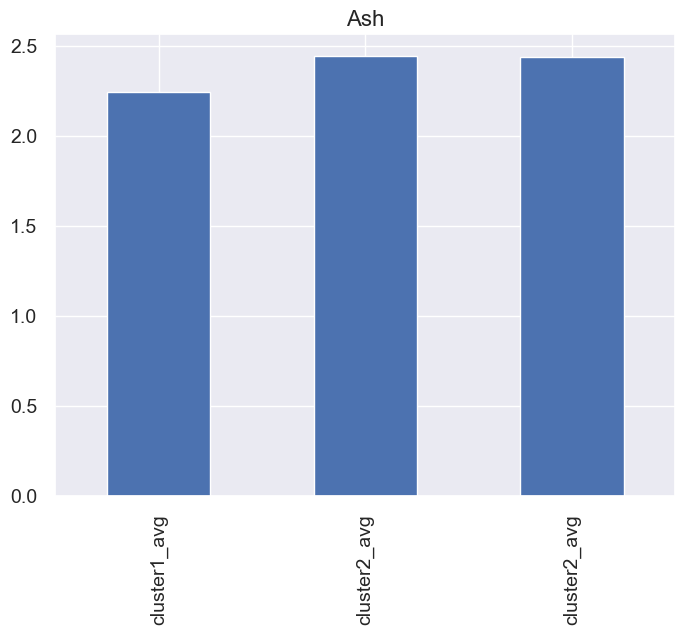

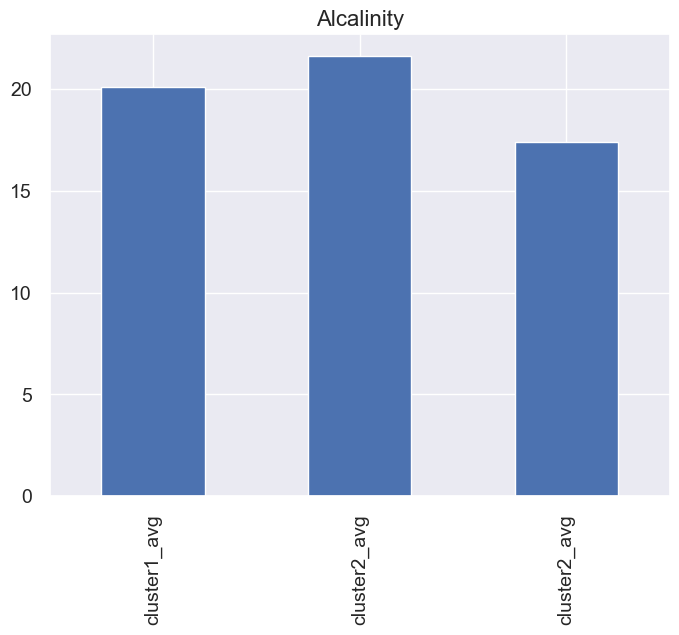

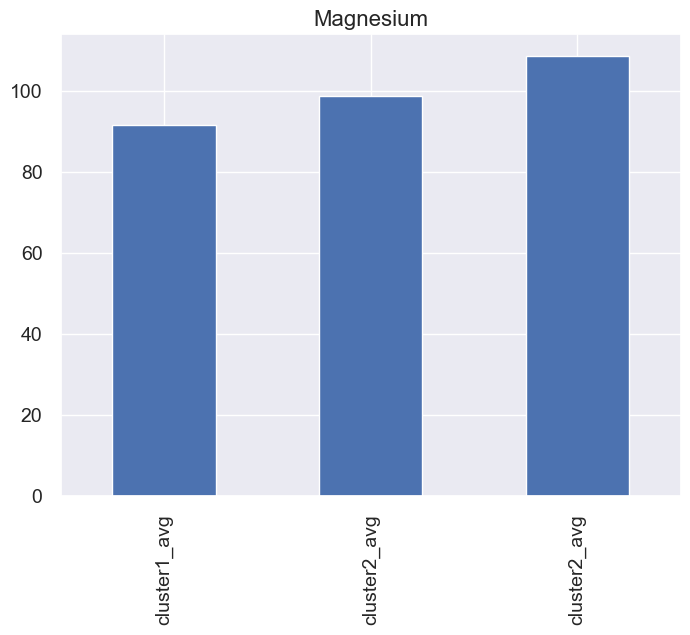

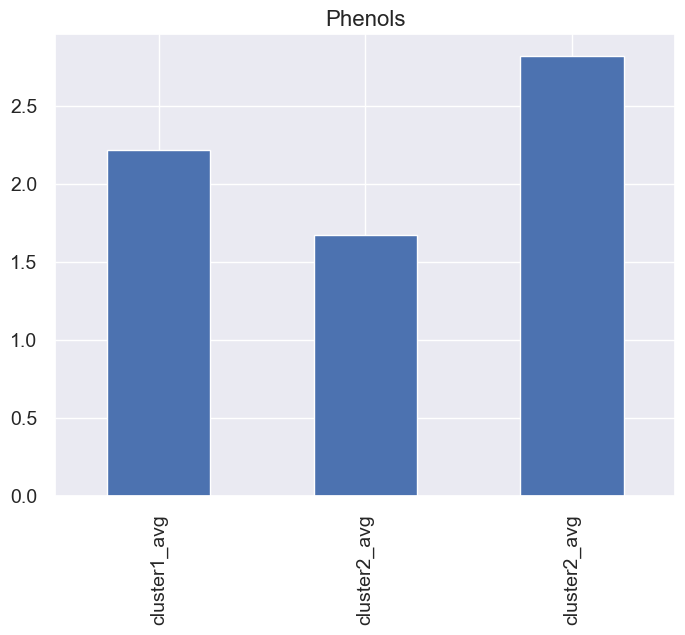

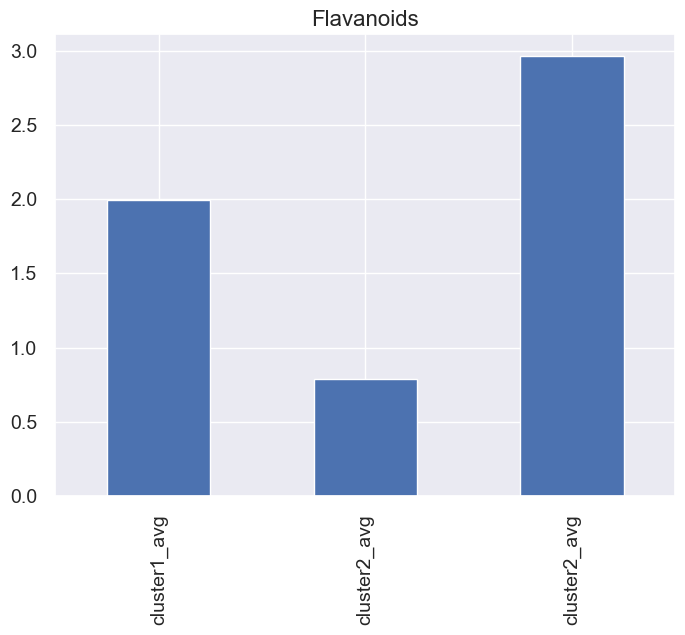

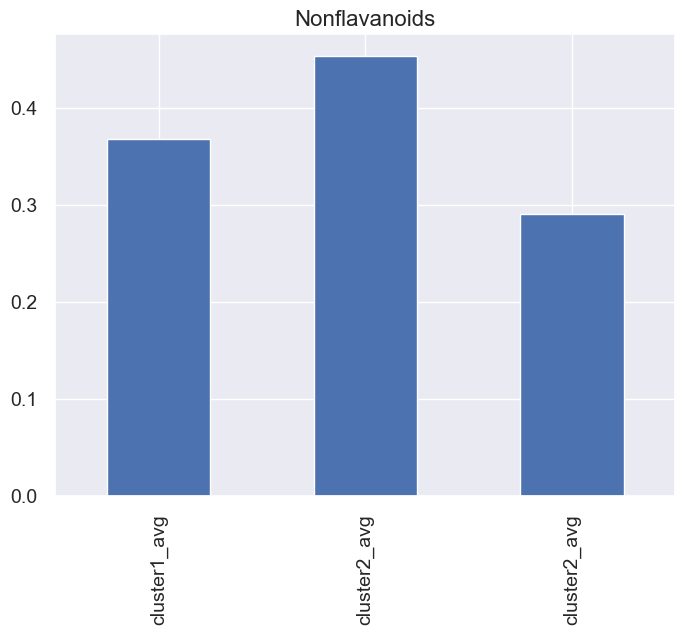

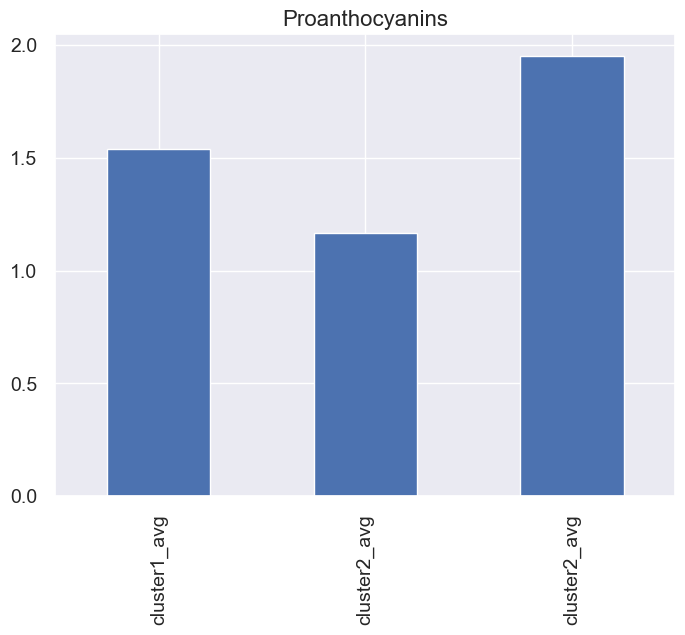

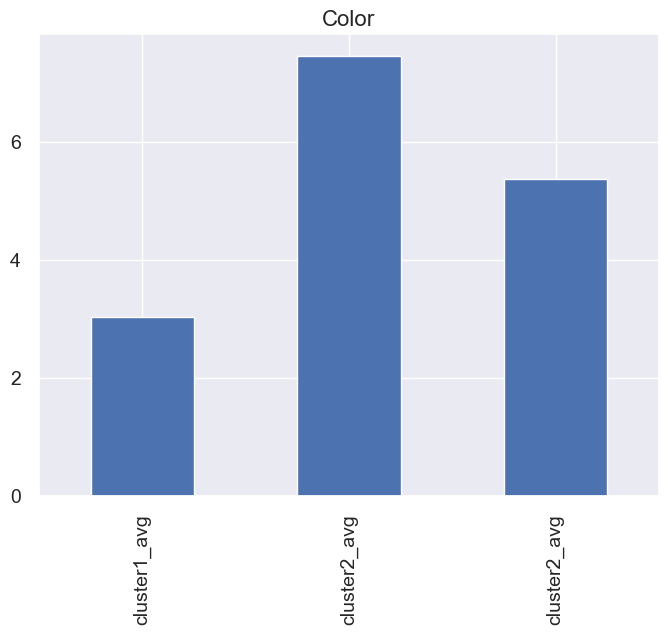

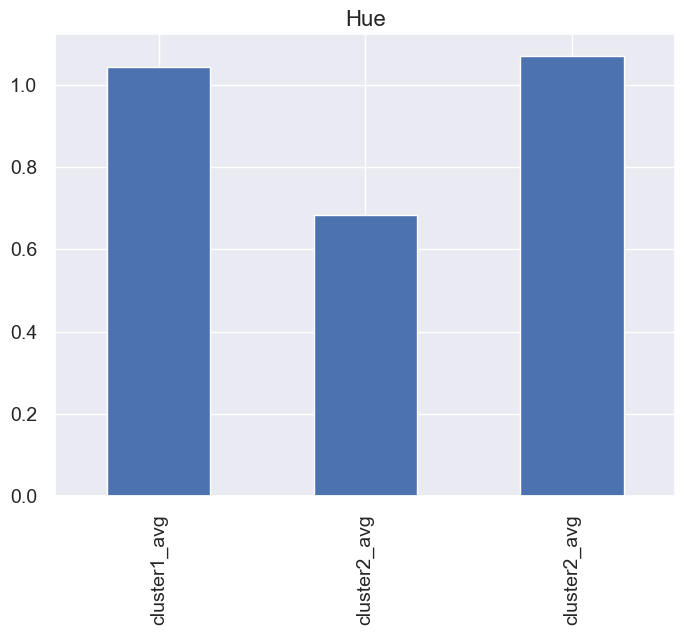

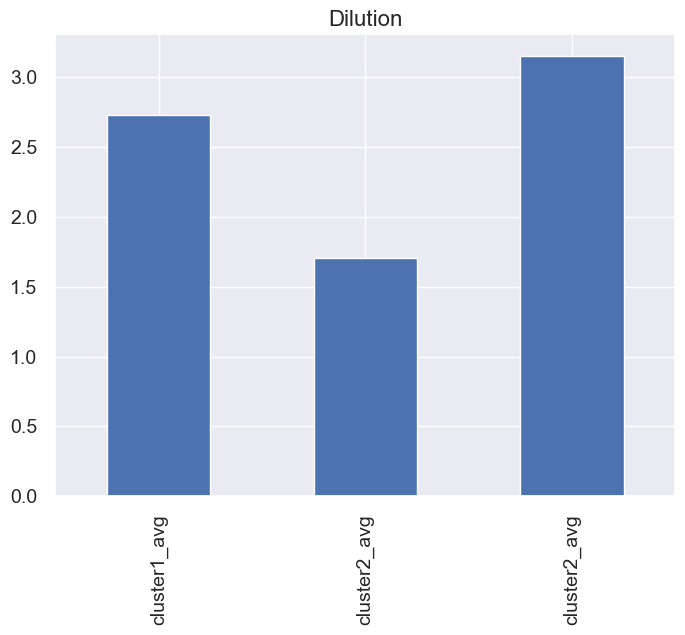

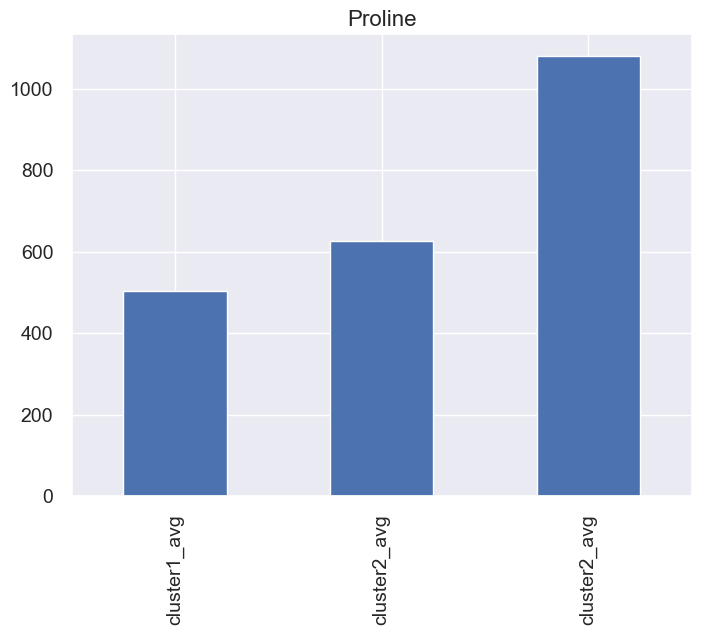

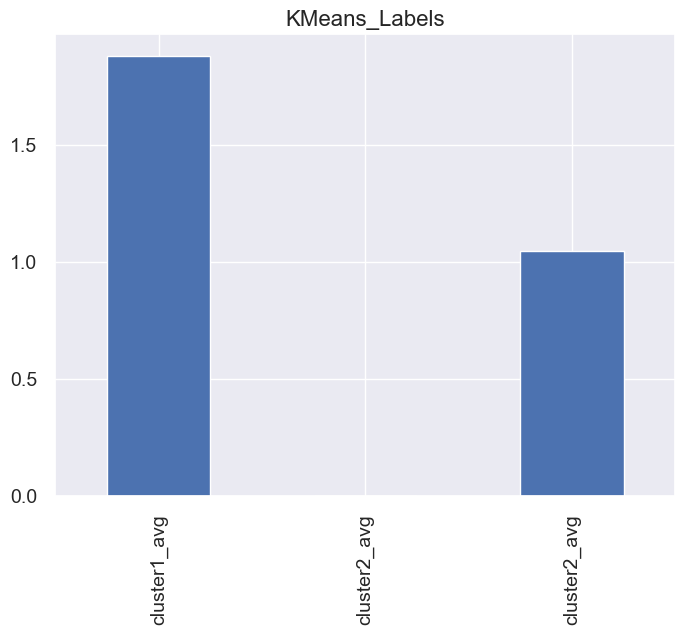

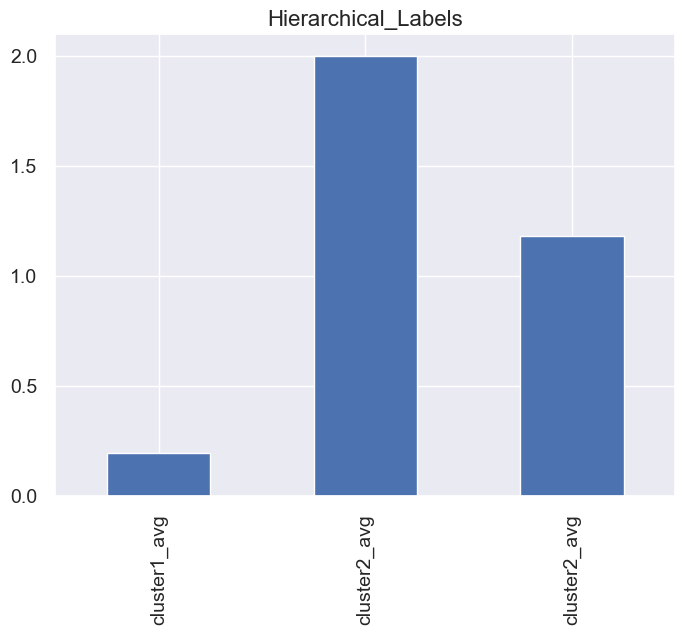

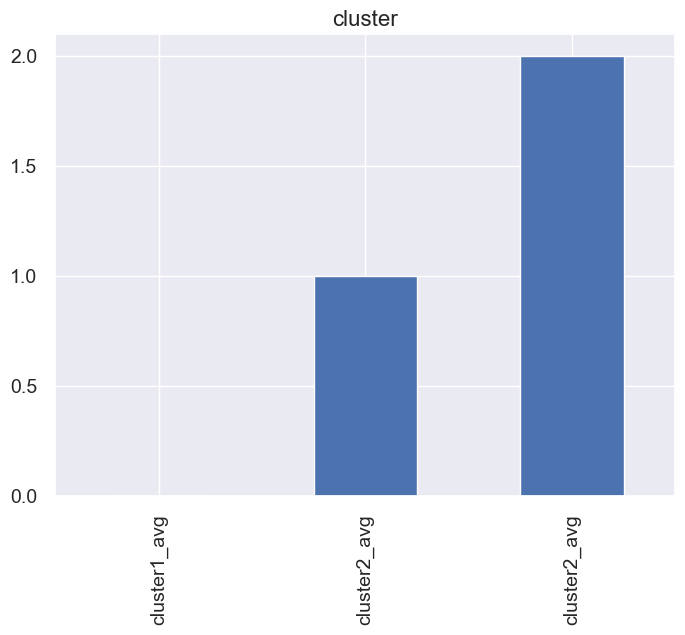

In [74]:
# Extract and plot one Column data .xs method
for i ,row in Avg_df.iterrows():
    fig=plt.subplots(figsize=(8,6))
    j=Avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

We have perfectly clustered the data into Three Types as compared to classification of three types of Wine was indicated in the Original Dataset in 'Type' Column